In [2]:
import sys
import pandas as pd

sys.path.append('/Users/melek/Documents/GitHub/OCCTOPI')
from functions.data_cleaner import data_cleaner
import matplotlib.pyplot as plt


In [3]:
tv_data = pd.read_csv("/Users/melek/Desktop/Research/Research Fall 2024/OCCTOPI/Device Data/TV_data.csv")
tv_data['Time'] = pd.to_datetime(tv_data['Time'],format='mixed')

let's how many (unique) devices we're dealing with

In [4]:
(tv_data['device_id'].unique())

array([180432, 180416, 180784, 180744, 180812, 180840, 181100, 181180,
       181372, 181504, 181568, 181792, 181796, 181944, 182356, 182580,
       182668, 182676, 183072, 183104, 183248, 183936, 184196, 183944,
       184216, 185120, 185532, 185540, 185536, 186056, 284568, 284584,
       284648, 286368, 286544, 286876, 286996, 287504, 287904, 287980,
       289476, 290004, 290076, 291796, 296336, 295424, 296804, 296696,
       297272, 298060, 299104, 299132, 301104, 563352, 564388, 564416,
       564624, 564568, 564712, 565344, 567608, 567968, 634132, 639448,
       651720, 652368, 652548, 654084, 654628, 656540, 657112, 656672])

let's also check that we have data every day for each device

In [5]:
for day in (tv_data['Time'].dt.dayofyear).unique():
    print(len(tv_data[tv_data['Time'].dt.dayofyear==day]['device_id'].unique()))

72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72


In [ ]:
device_data = tv_data[tv_data['device_id'] == 180432]

# Calculate running average (with a window size of your choice, e.g., 10 minutes)
device_data['running_avg'] = device_data['Power'].rolling(window=10).mean()

# Calculate power changes (difference between consecutive readings)
device_data['power_change'] = device_data['Power'].diff()

# Detect power peaks (you can set a threshold based on domain knowledge)
# threshold = device_data['Power'].quantile(0.95)  # Define peak as top 5% of power values
# device_data['power_peak'] = device_data['Power'] > threshold

# # Detect on/off events (e.g., power > some threshold indicates "on")
# on_threshold = device_data['Power'].mean()  # A simple threshold using mean power
# device_data['on_off_event'] = device_data['Power'] > on_threshold

# # Preview the results
# print(device_data[['Time', 'Power', 'running_avg', 'power_change', 'power_peak', 'on_off_event']].head())

/var/folders/ym/z79dll090wxf8wncdssnz92r0000gn/T/ipykernel_11722/2806454588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_data['running_avg'] = device_data['Power'].rolling(window=10).mean()


In [6]:
def quick_plot(time_series,
                     data_series, 
                     title="Time Series Plot", 
                     xlabel="Time", 
                     ylabel="Value"):
    plt.figure(figsize=(10, 3),dpi=500)
    plt.scatter(time_series, data_series, s=2)  # Use scatter plot for time vs data
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Proof of concept

In [7]:
day = min(tv_data['Time'].dt.dayofyear)
device_data = tv_data[tv_data['Time'].dt.dayofyear==day]

### Rolling average

In [8]:
df = pd.DataFrame()
df.index = device_data['device_id'].unique()

#### Quick plots

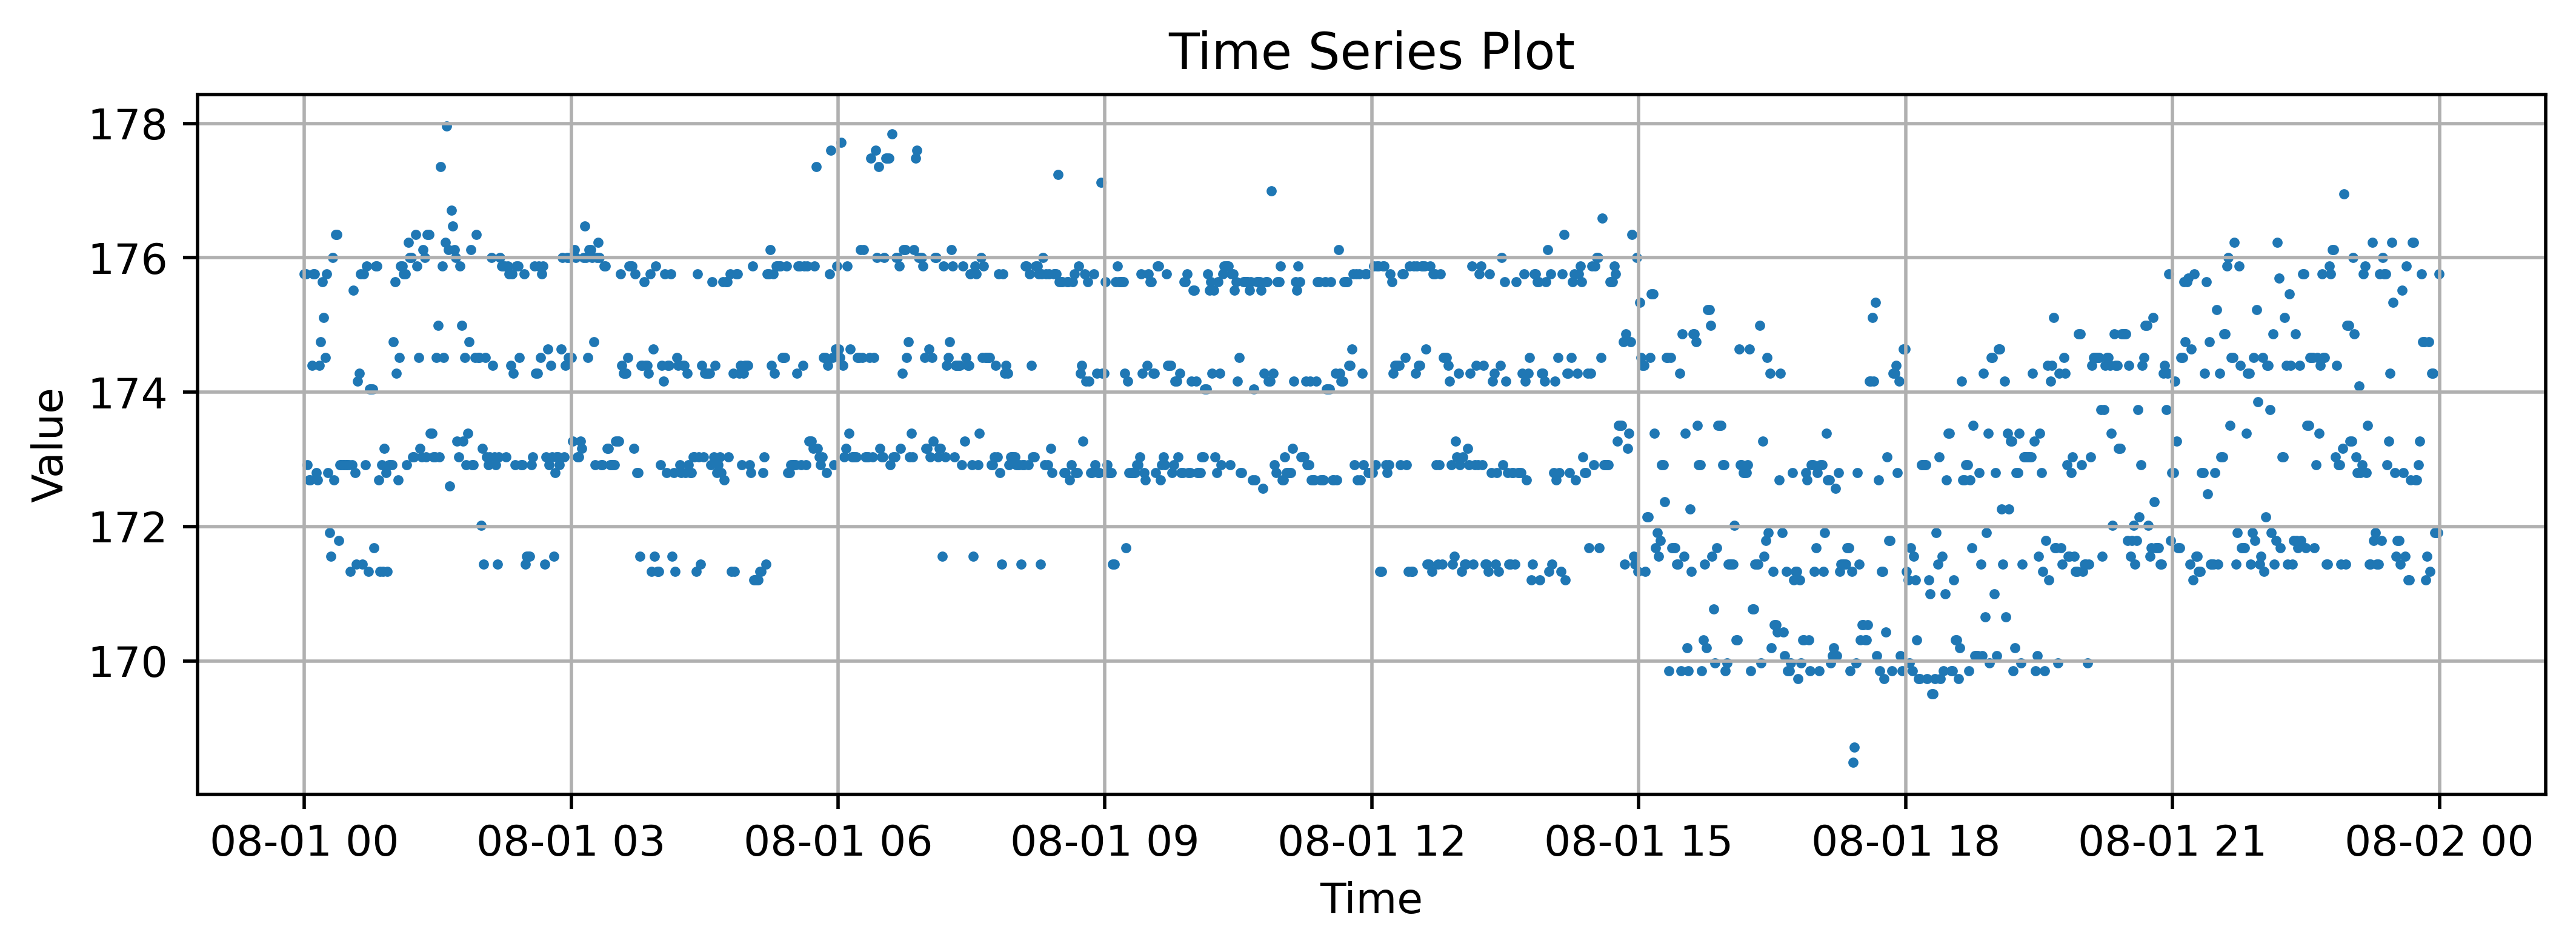

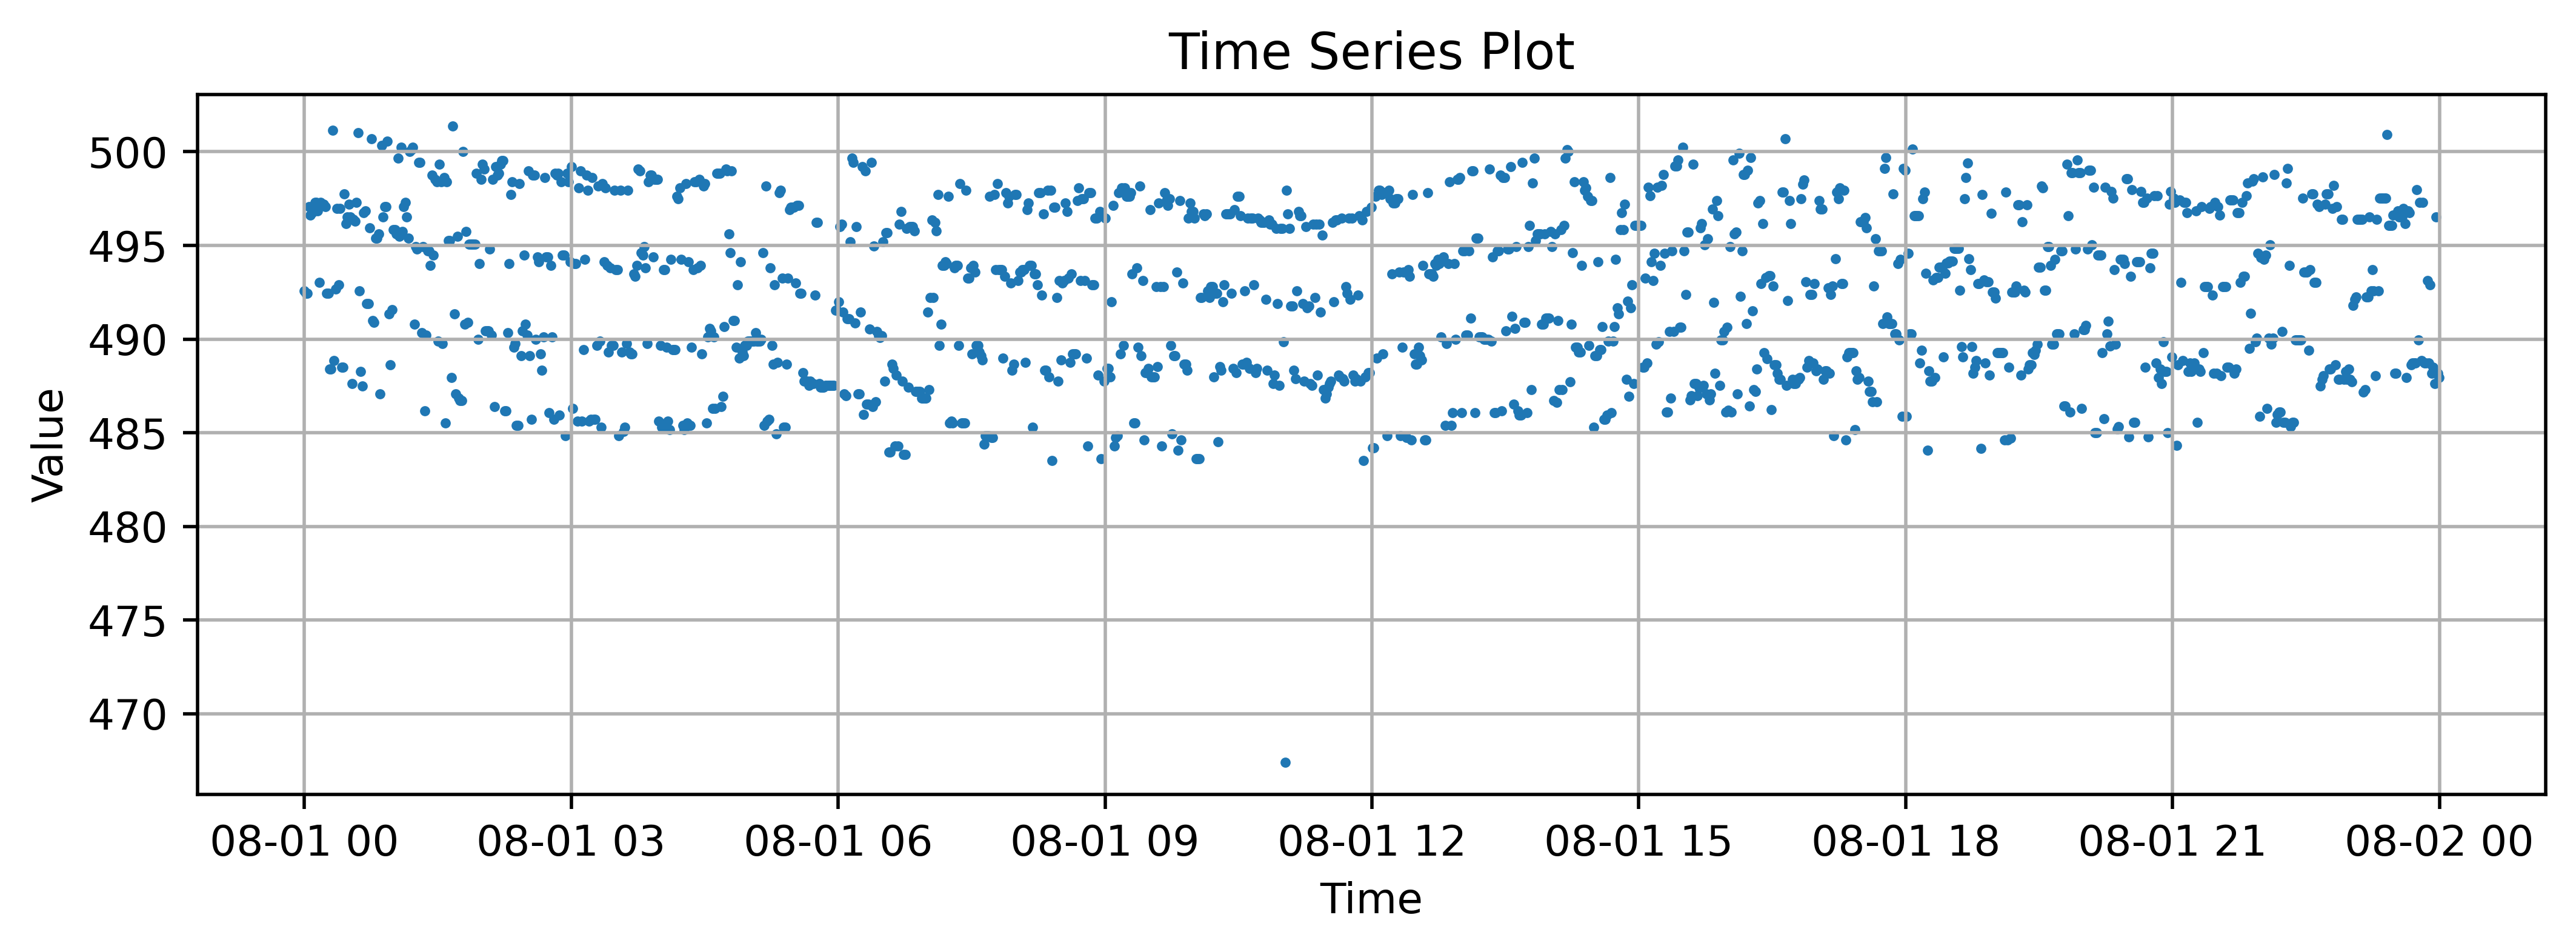

In [9]:
device_A = device_data[device_data['device_id']==180432]
device_B = device_data[device_data['device_id']==180840]
quick_plot(device_A['Time'],device_A['Power'])
quick_plot(device_B['Time'],device_B['Power'])

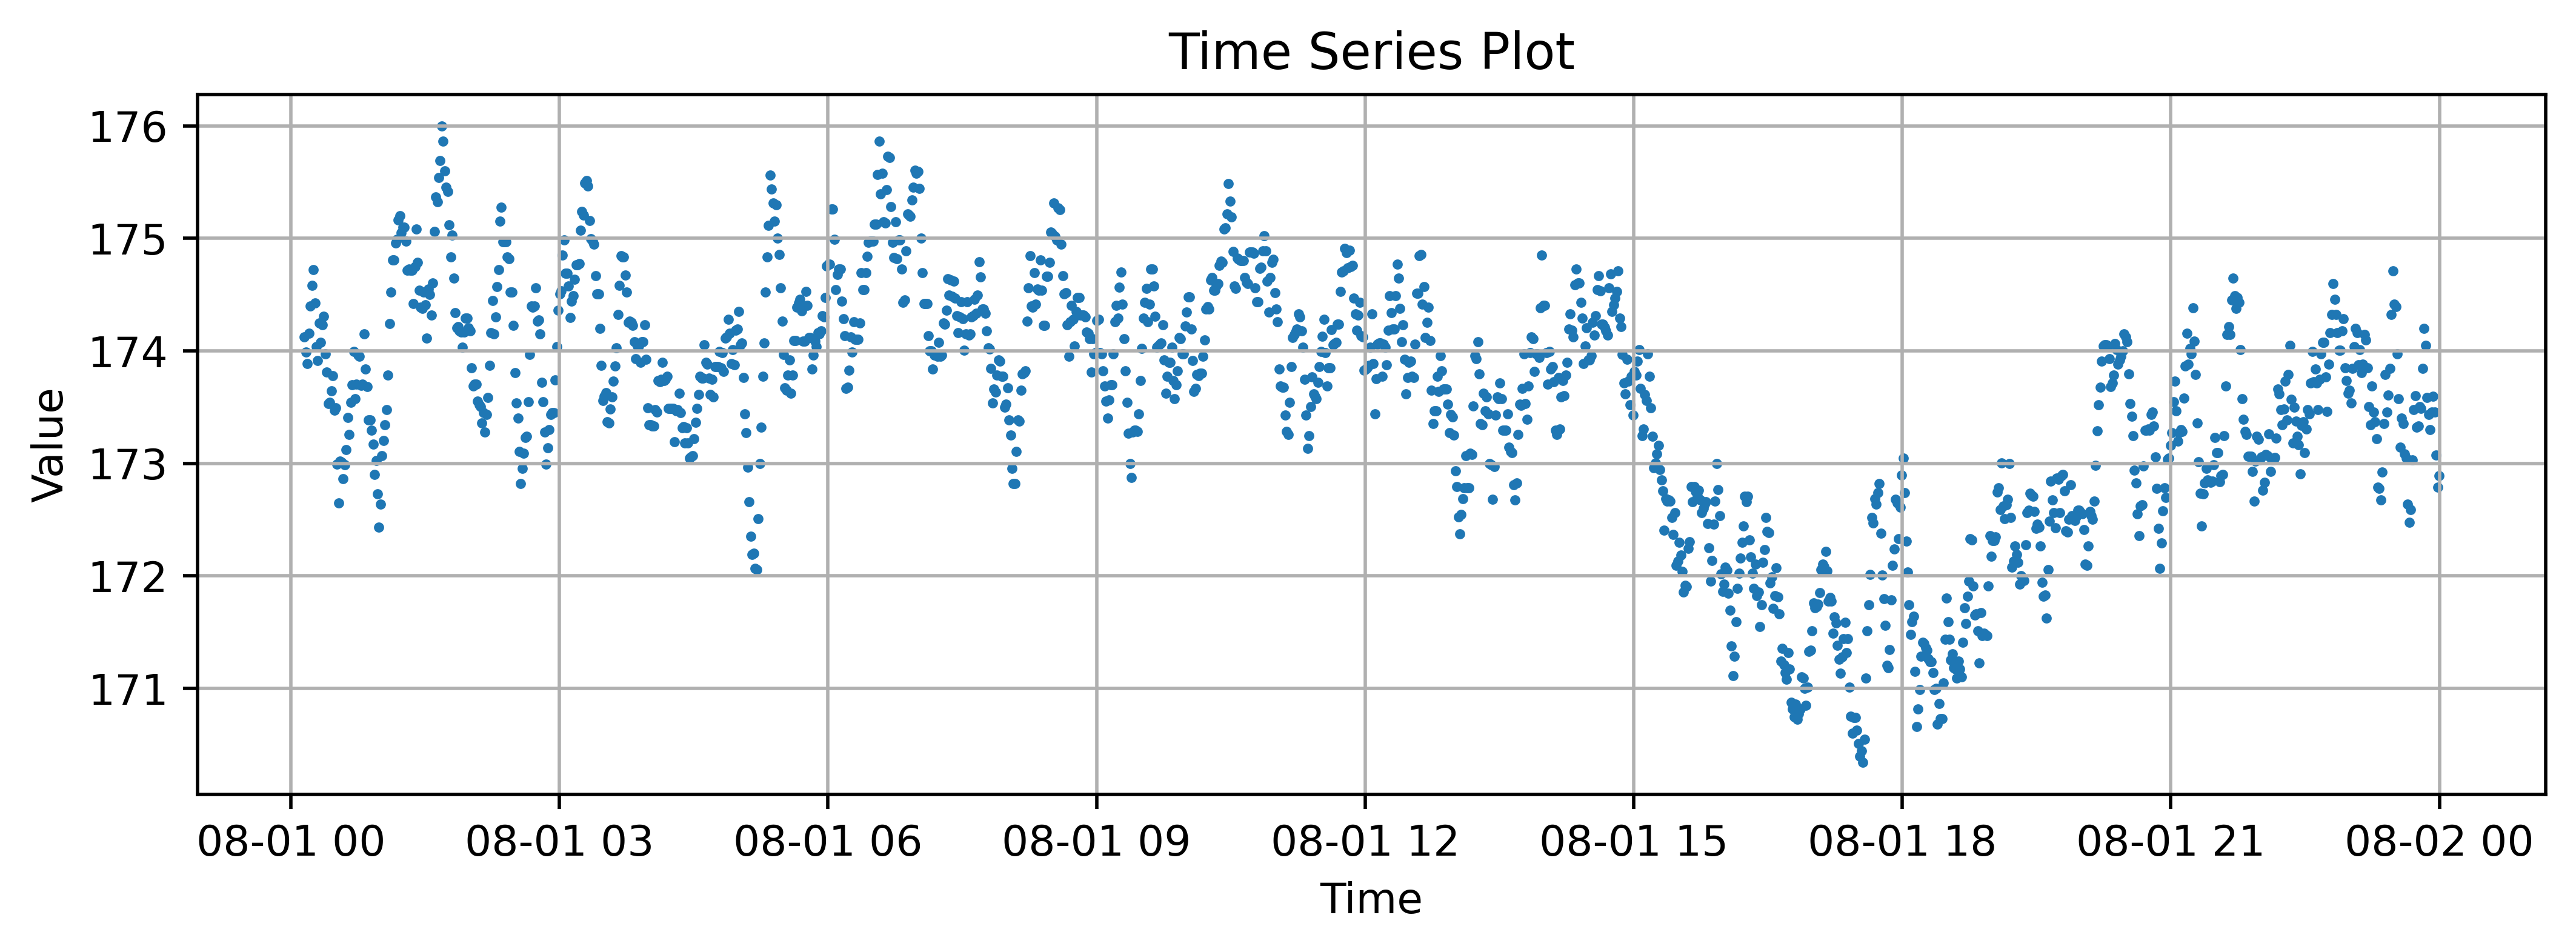

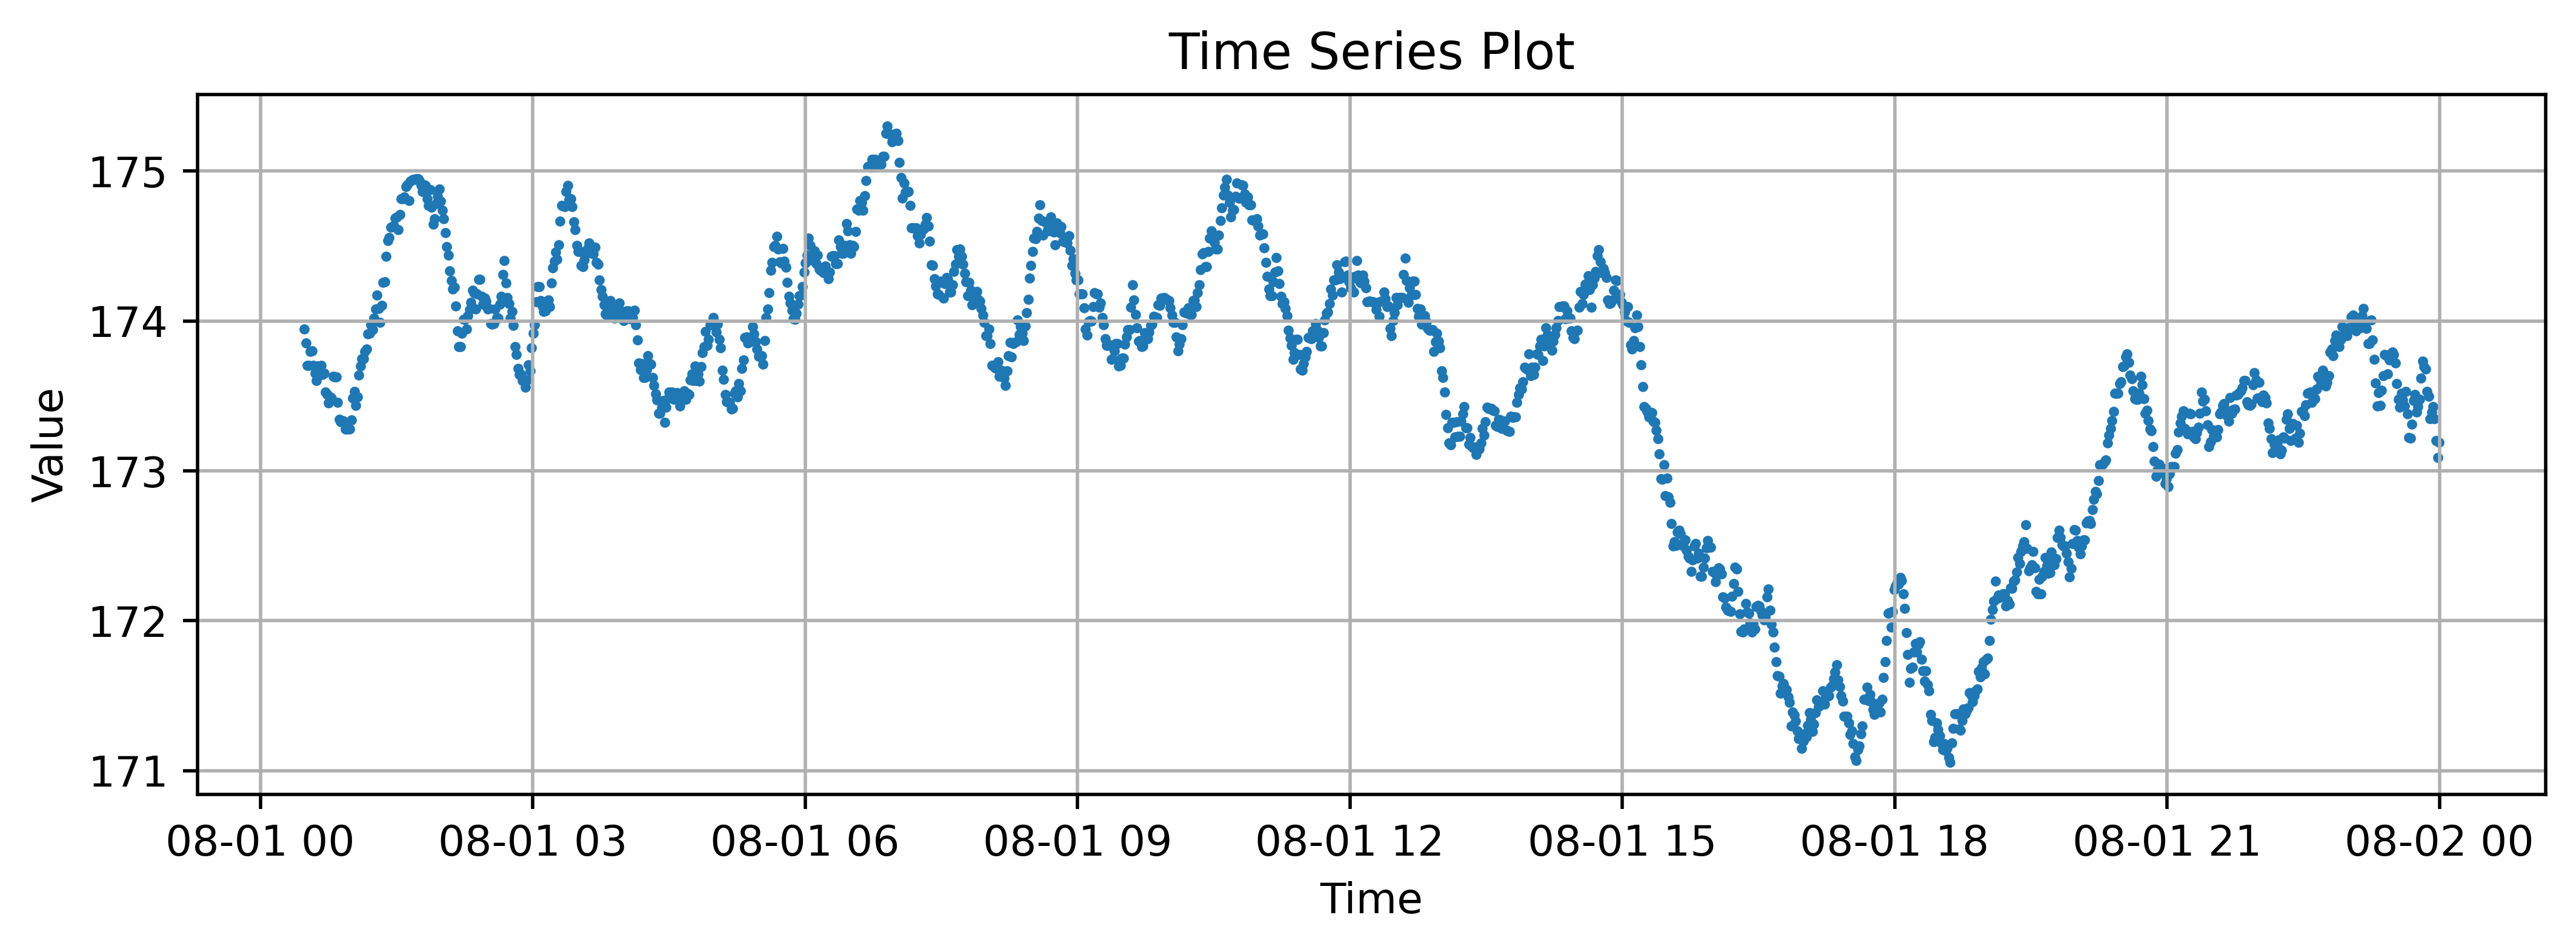

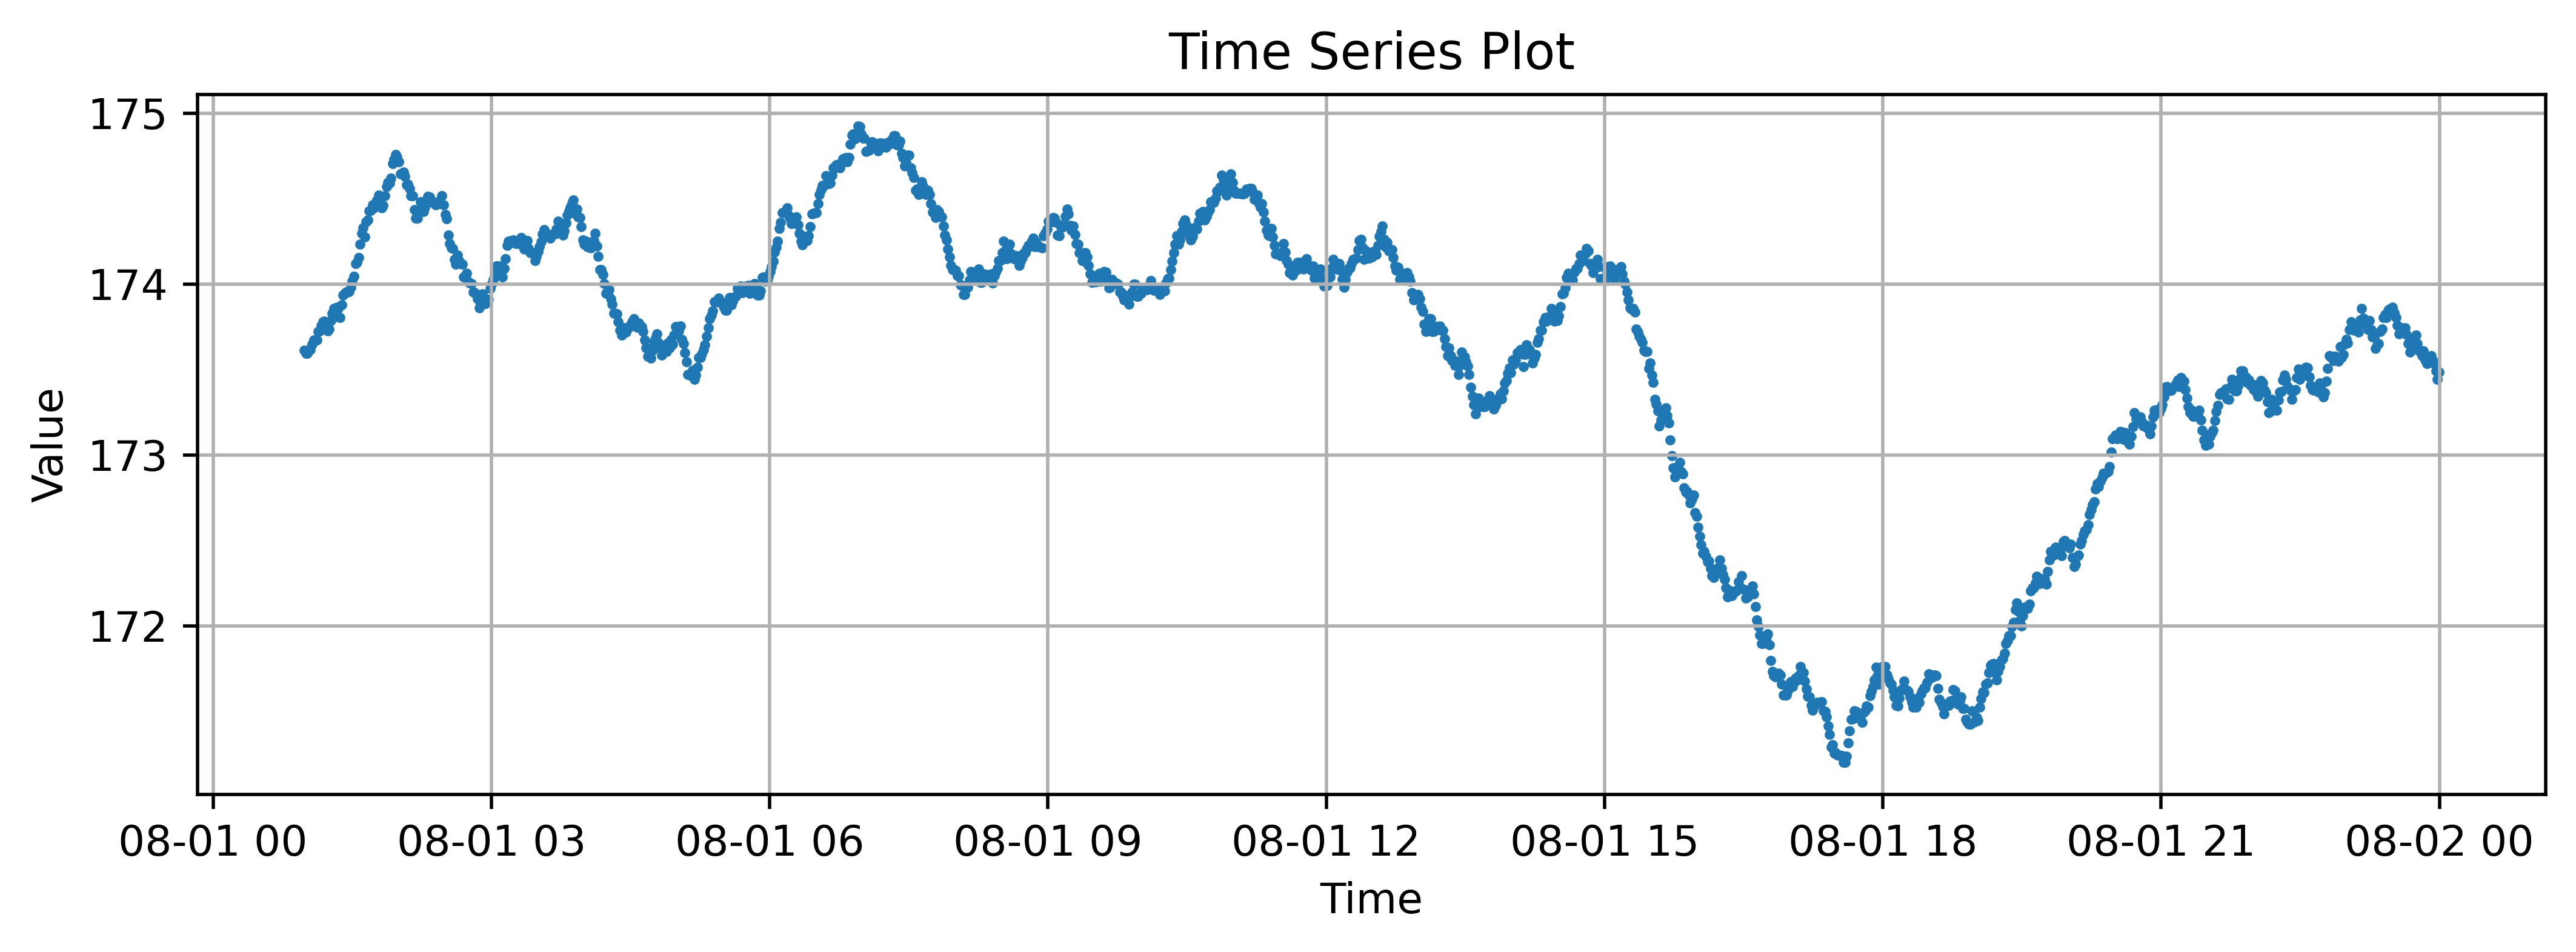

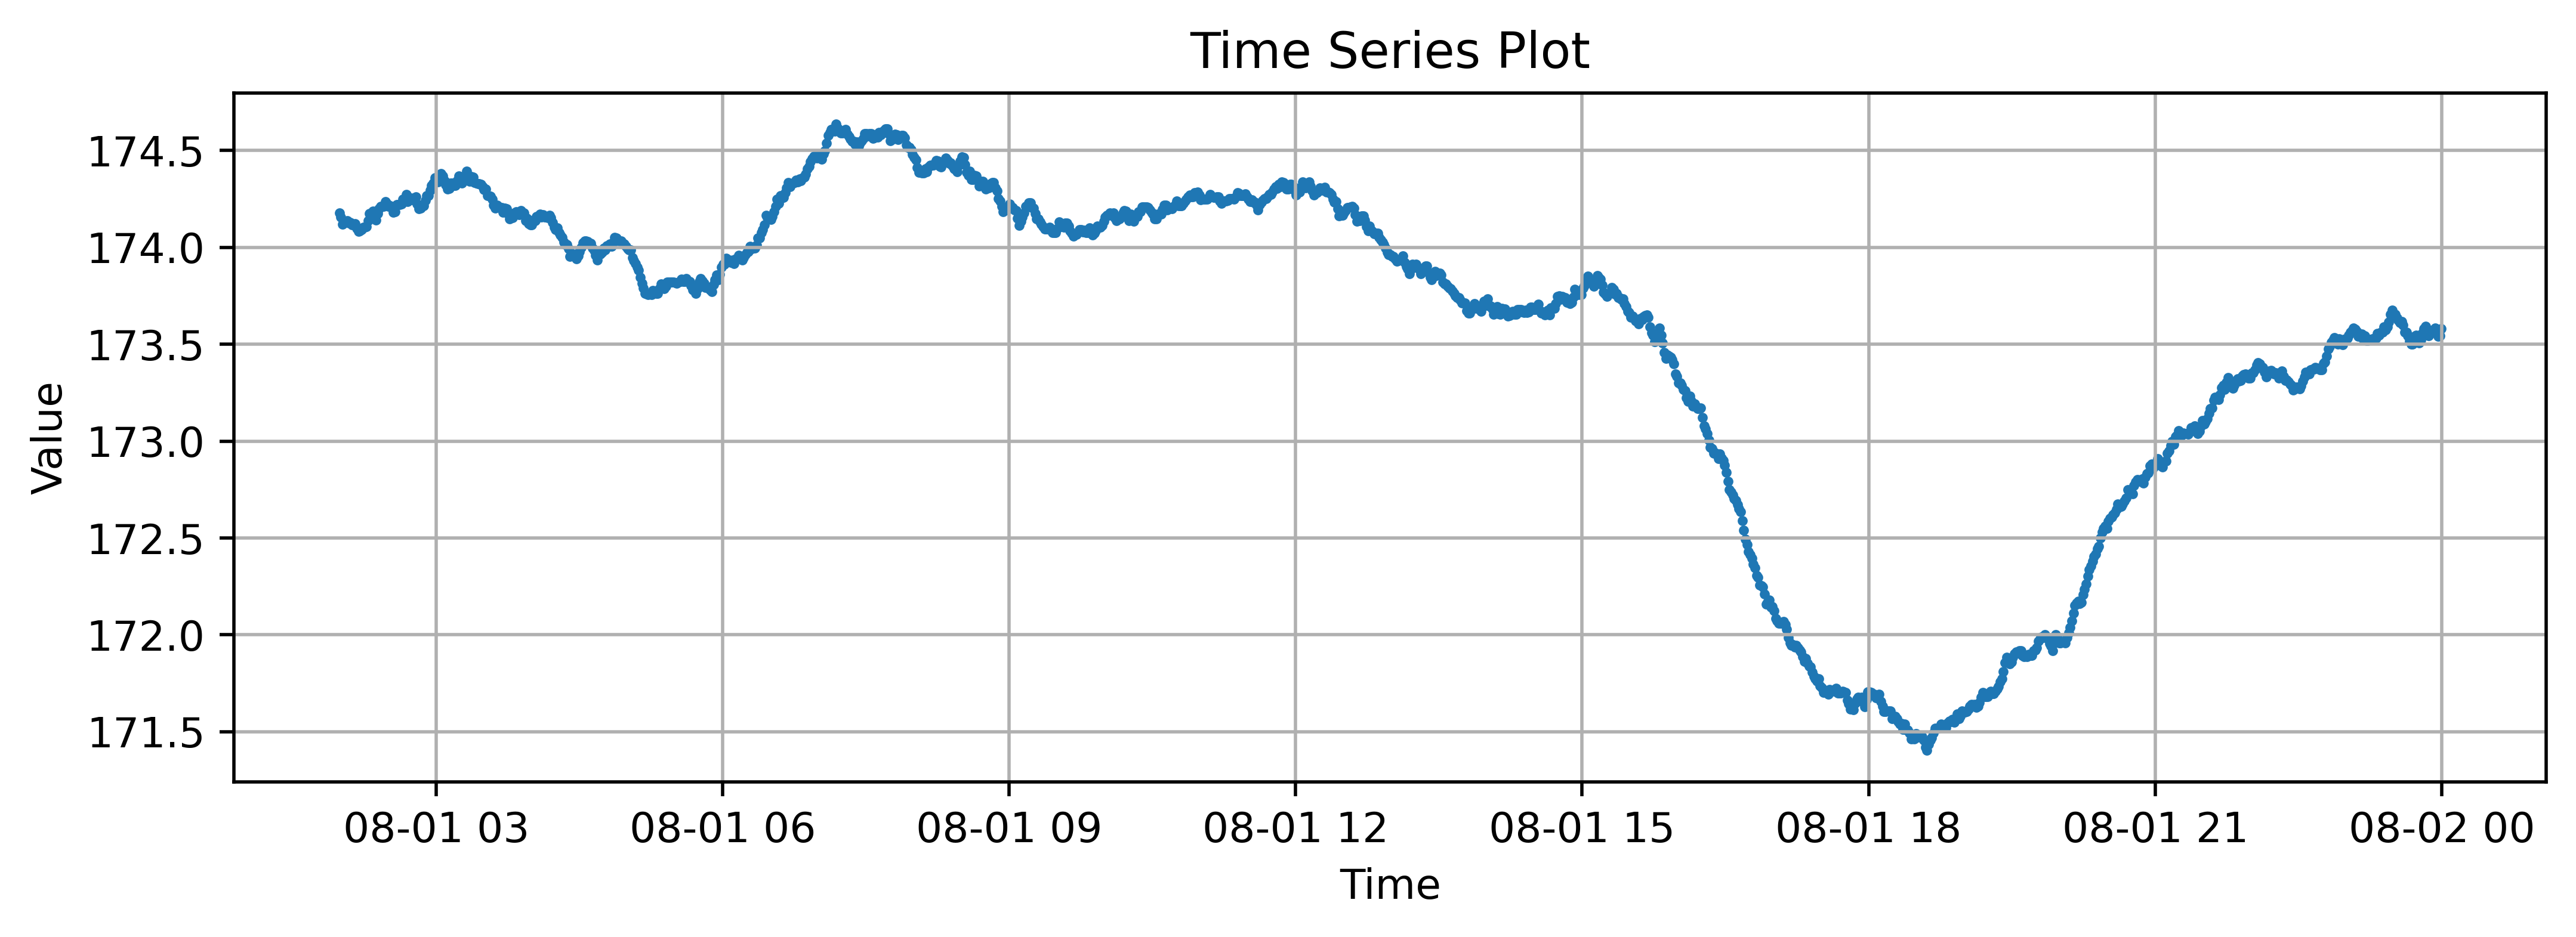

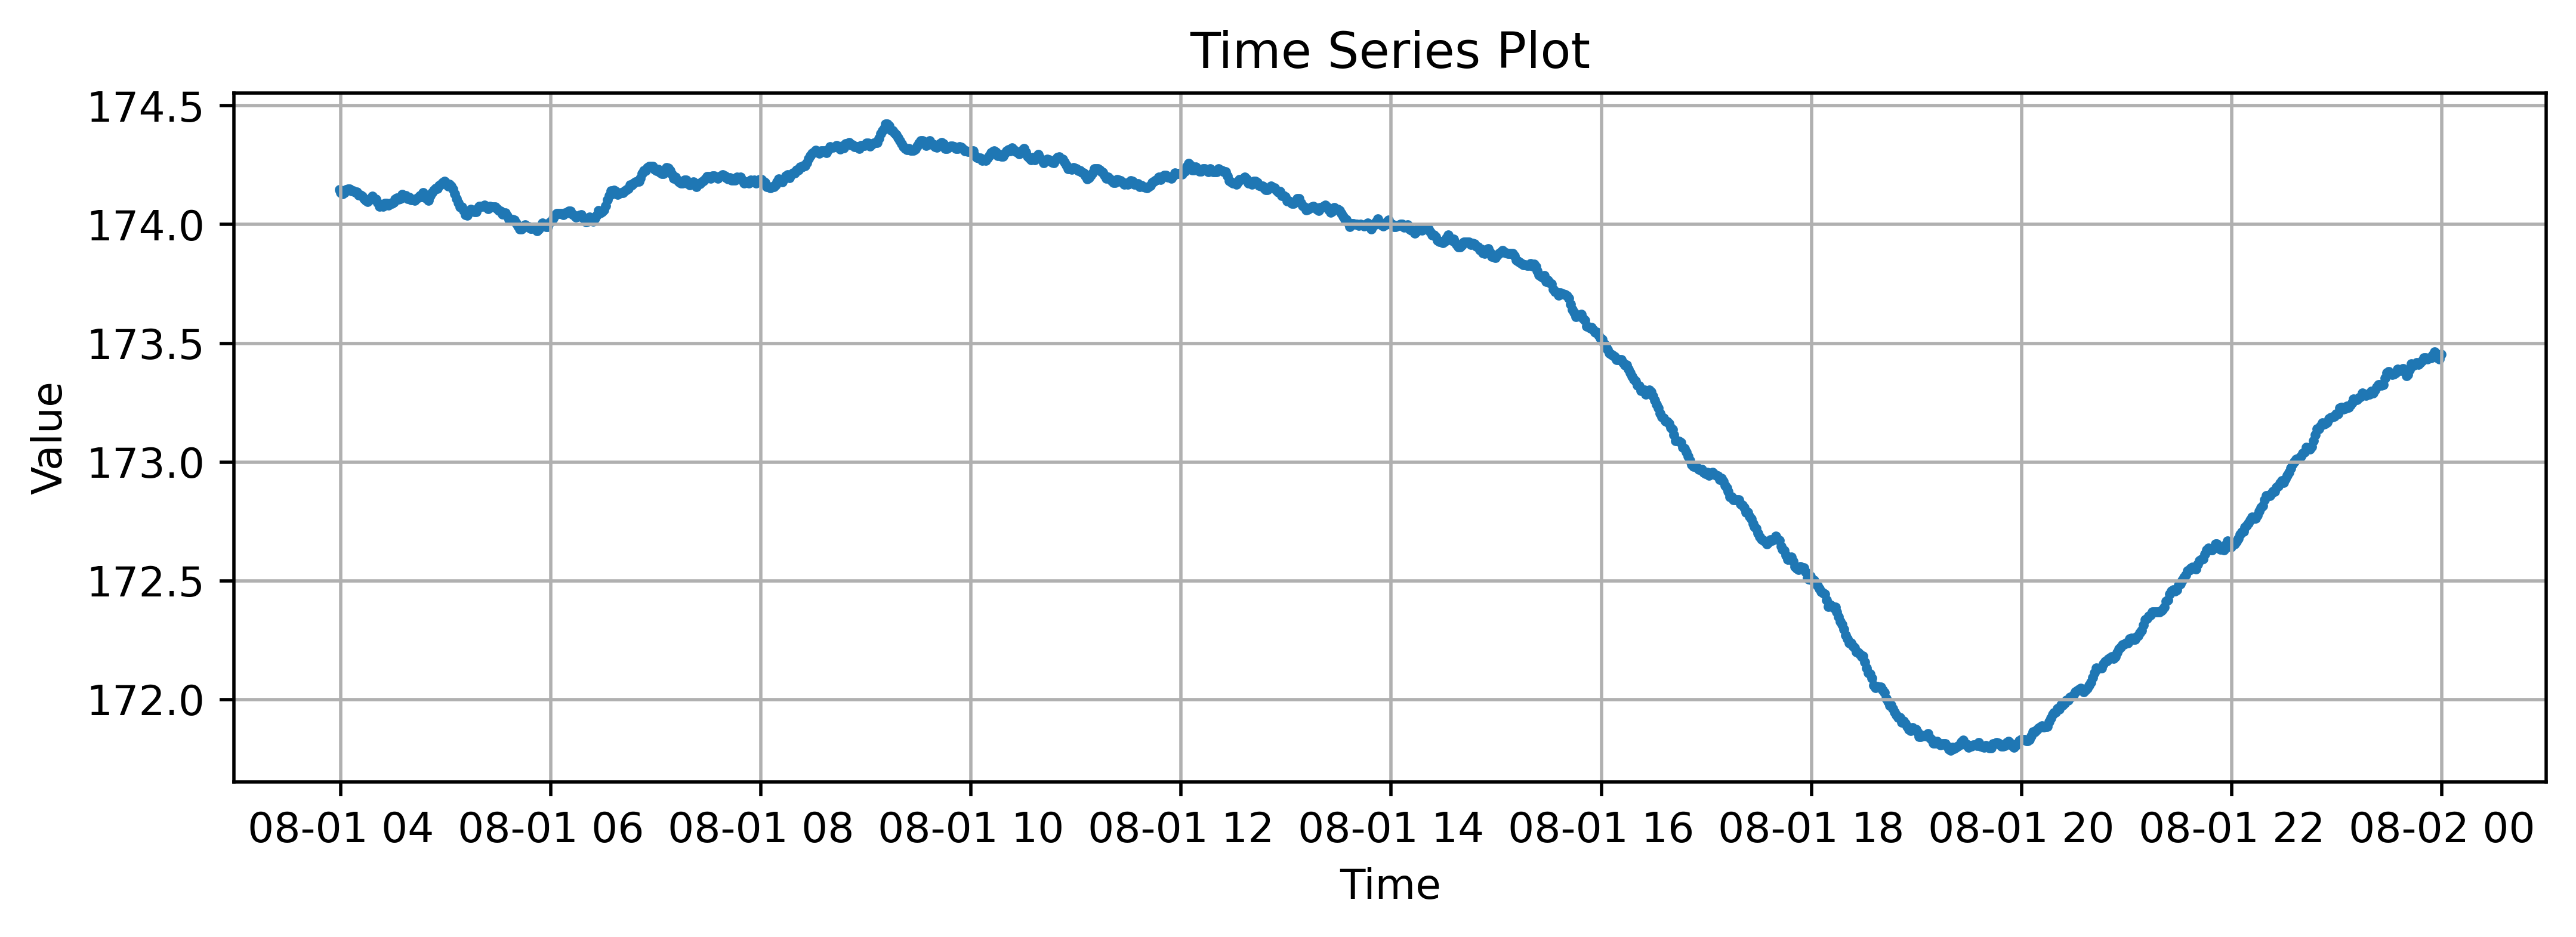

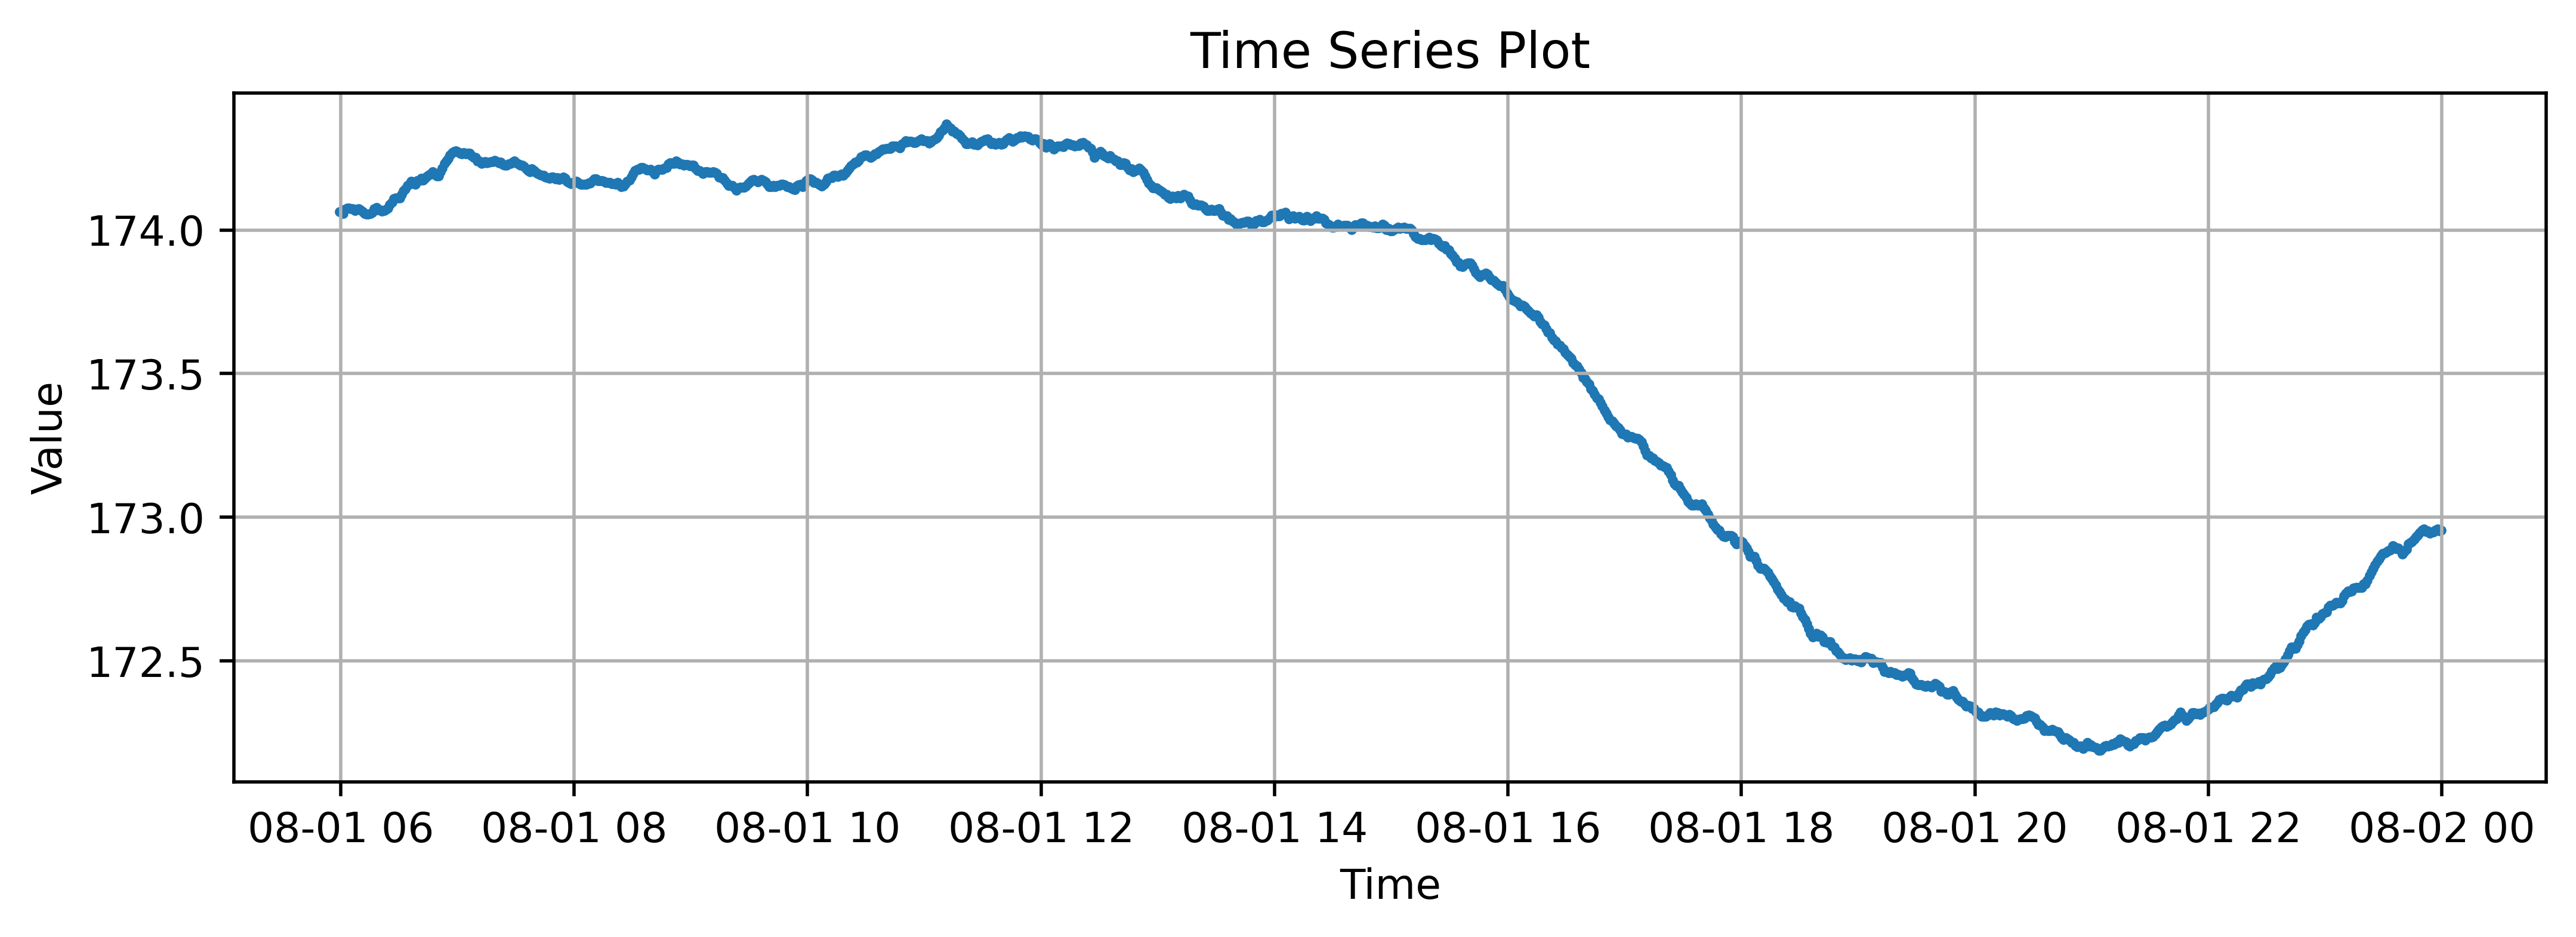

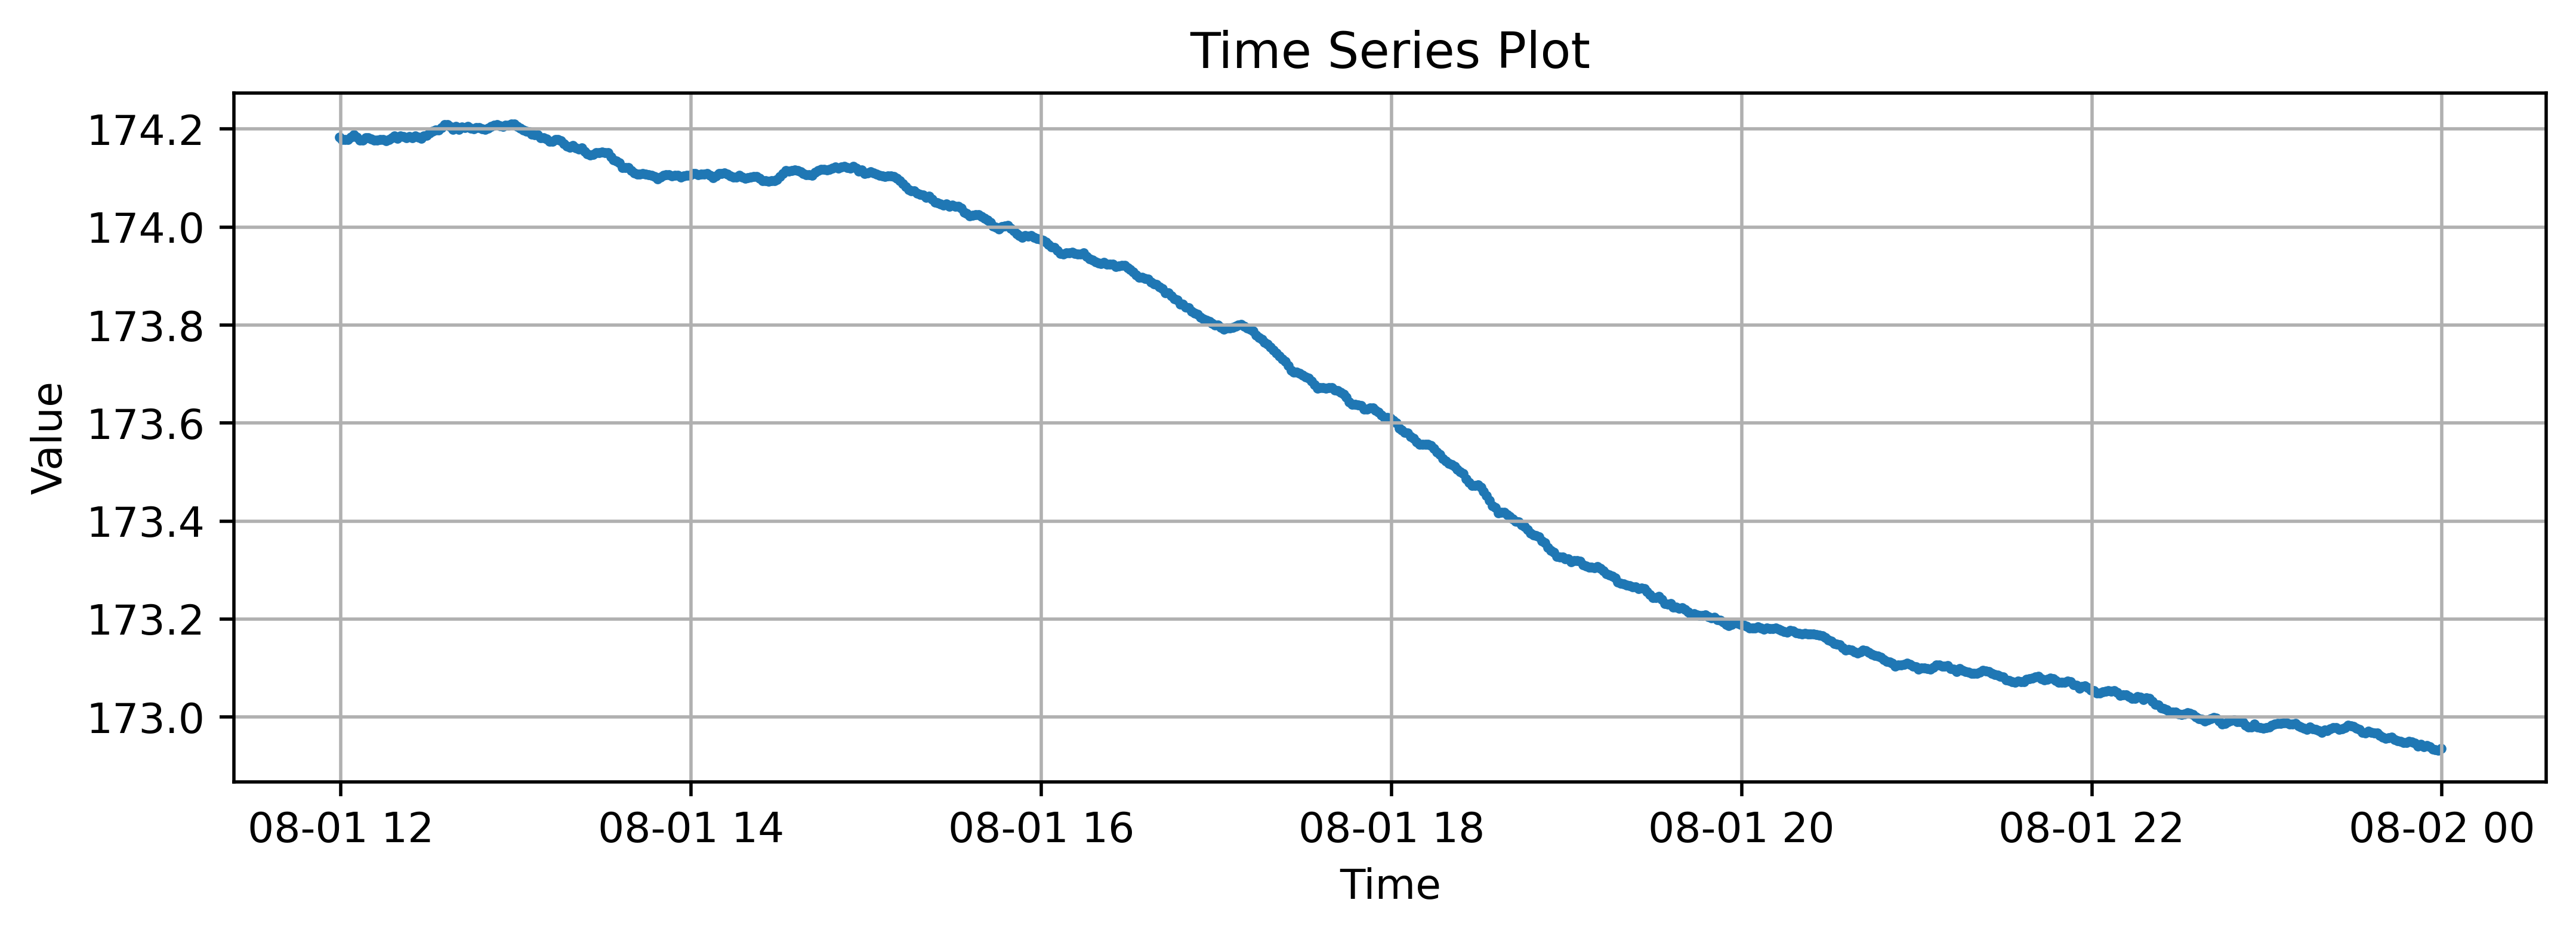

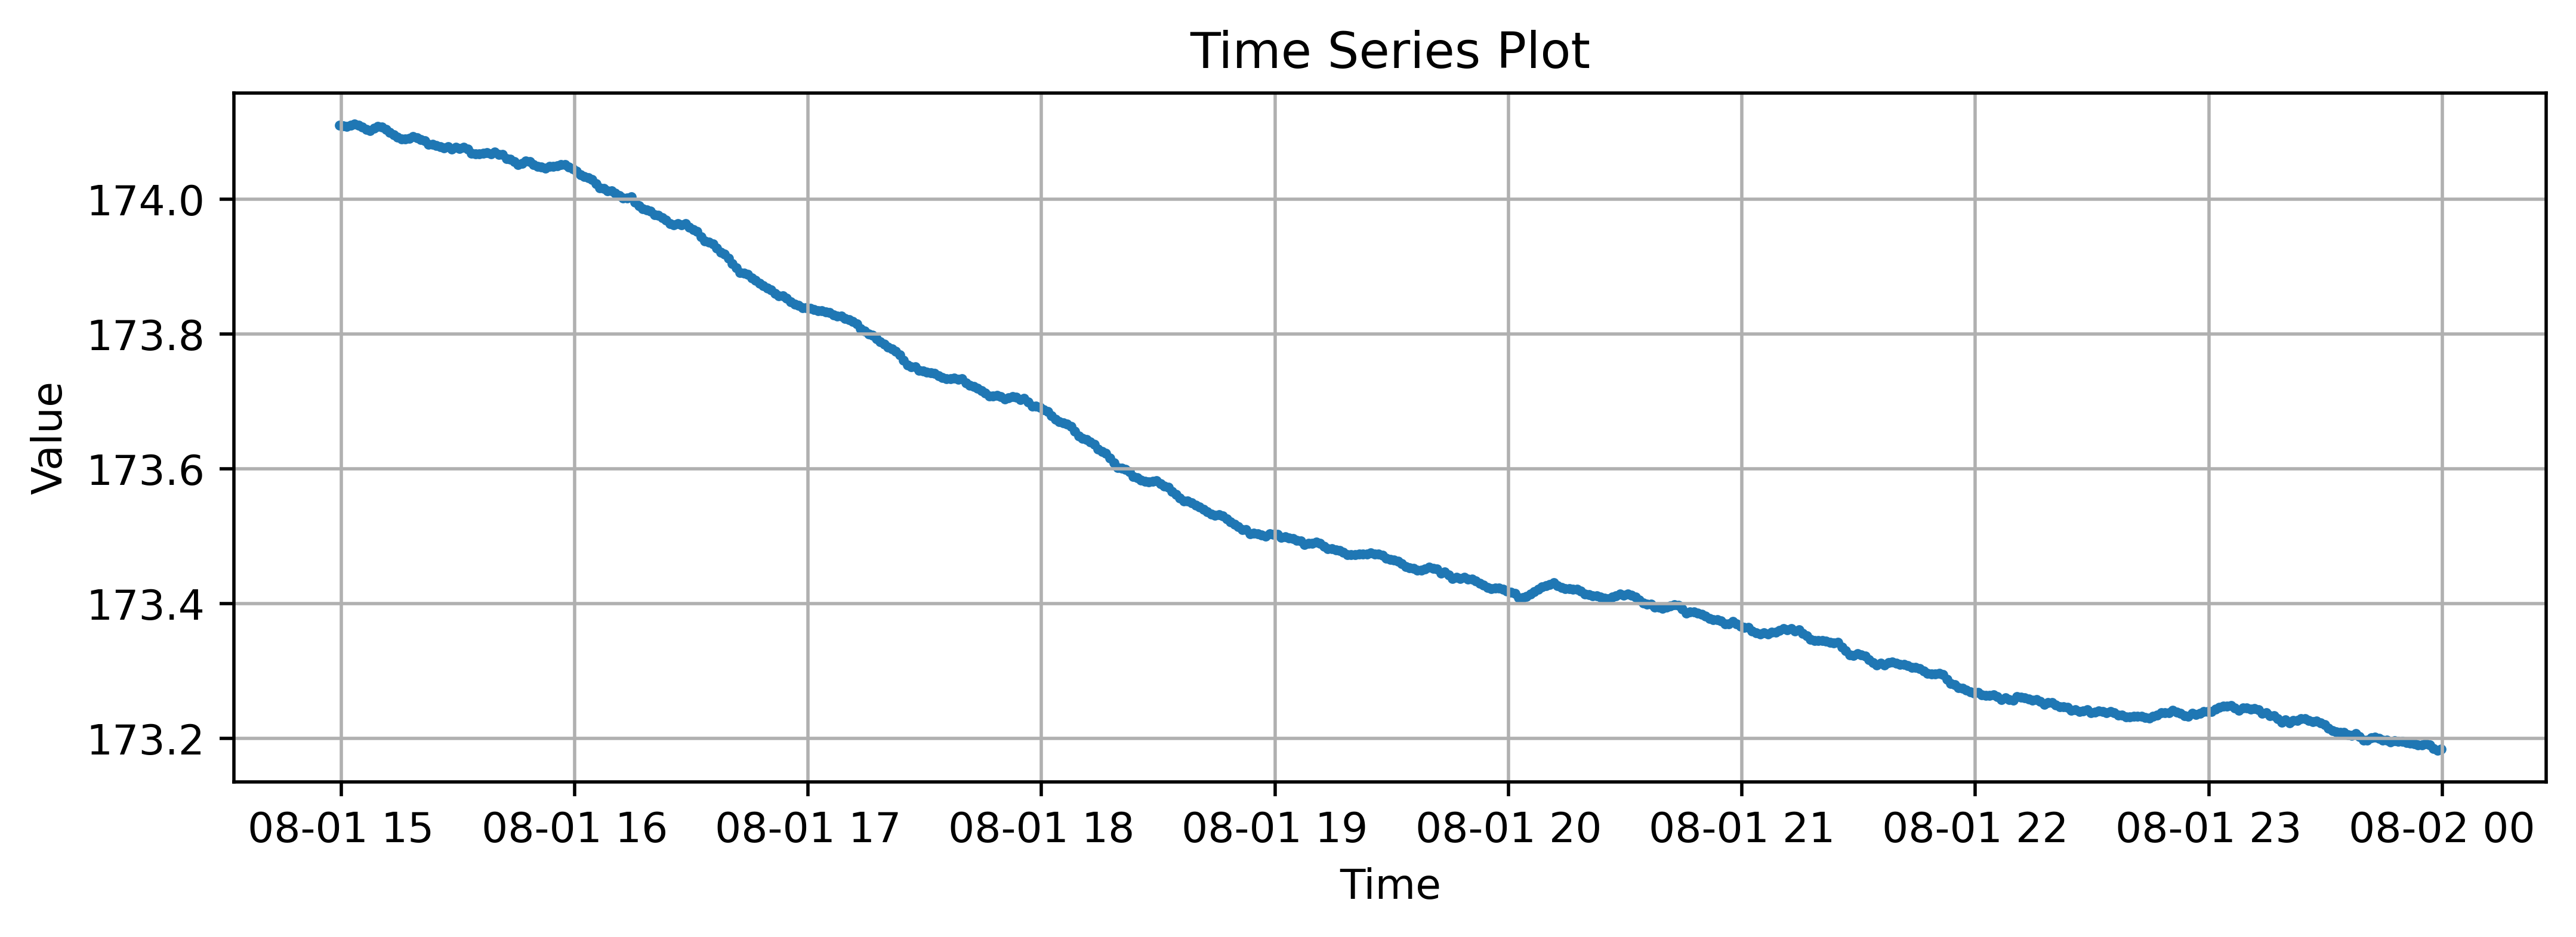

In [12]:
quick_plot(device_A['Time'],device_A['Power'].rolling(window=10).mean())
quick_plot(device_A['Time'],device_A['Power'].rolling(window=30).mean())
quick_plot(device_A['Time'],device_A['Power'].rolling(window=60).mean())
quick_plot(device_A['Time'],device_A['Power'].rolling(window=2*60).mean())
quick_plot(device_A['Time'],device_A['Power'].rolling(window=4*60).mean())
quick_plot(device_A['Time'],device_A['Power'].rolling(window=6*60).mean())
quick_plot(device_A['Time'],device_A['Power'].rolling(window=12*60).mean())
quick_plot(device_A['Time'],device_A['Power'].rolling(window=15*60).mean())

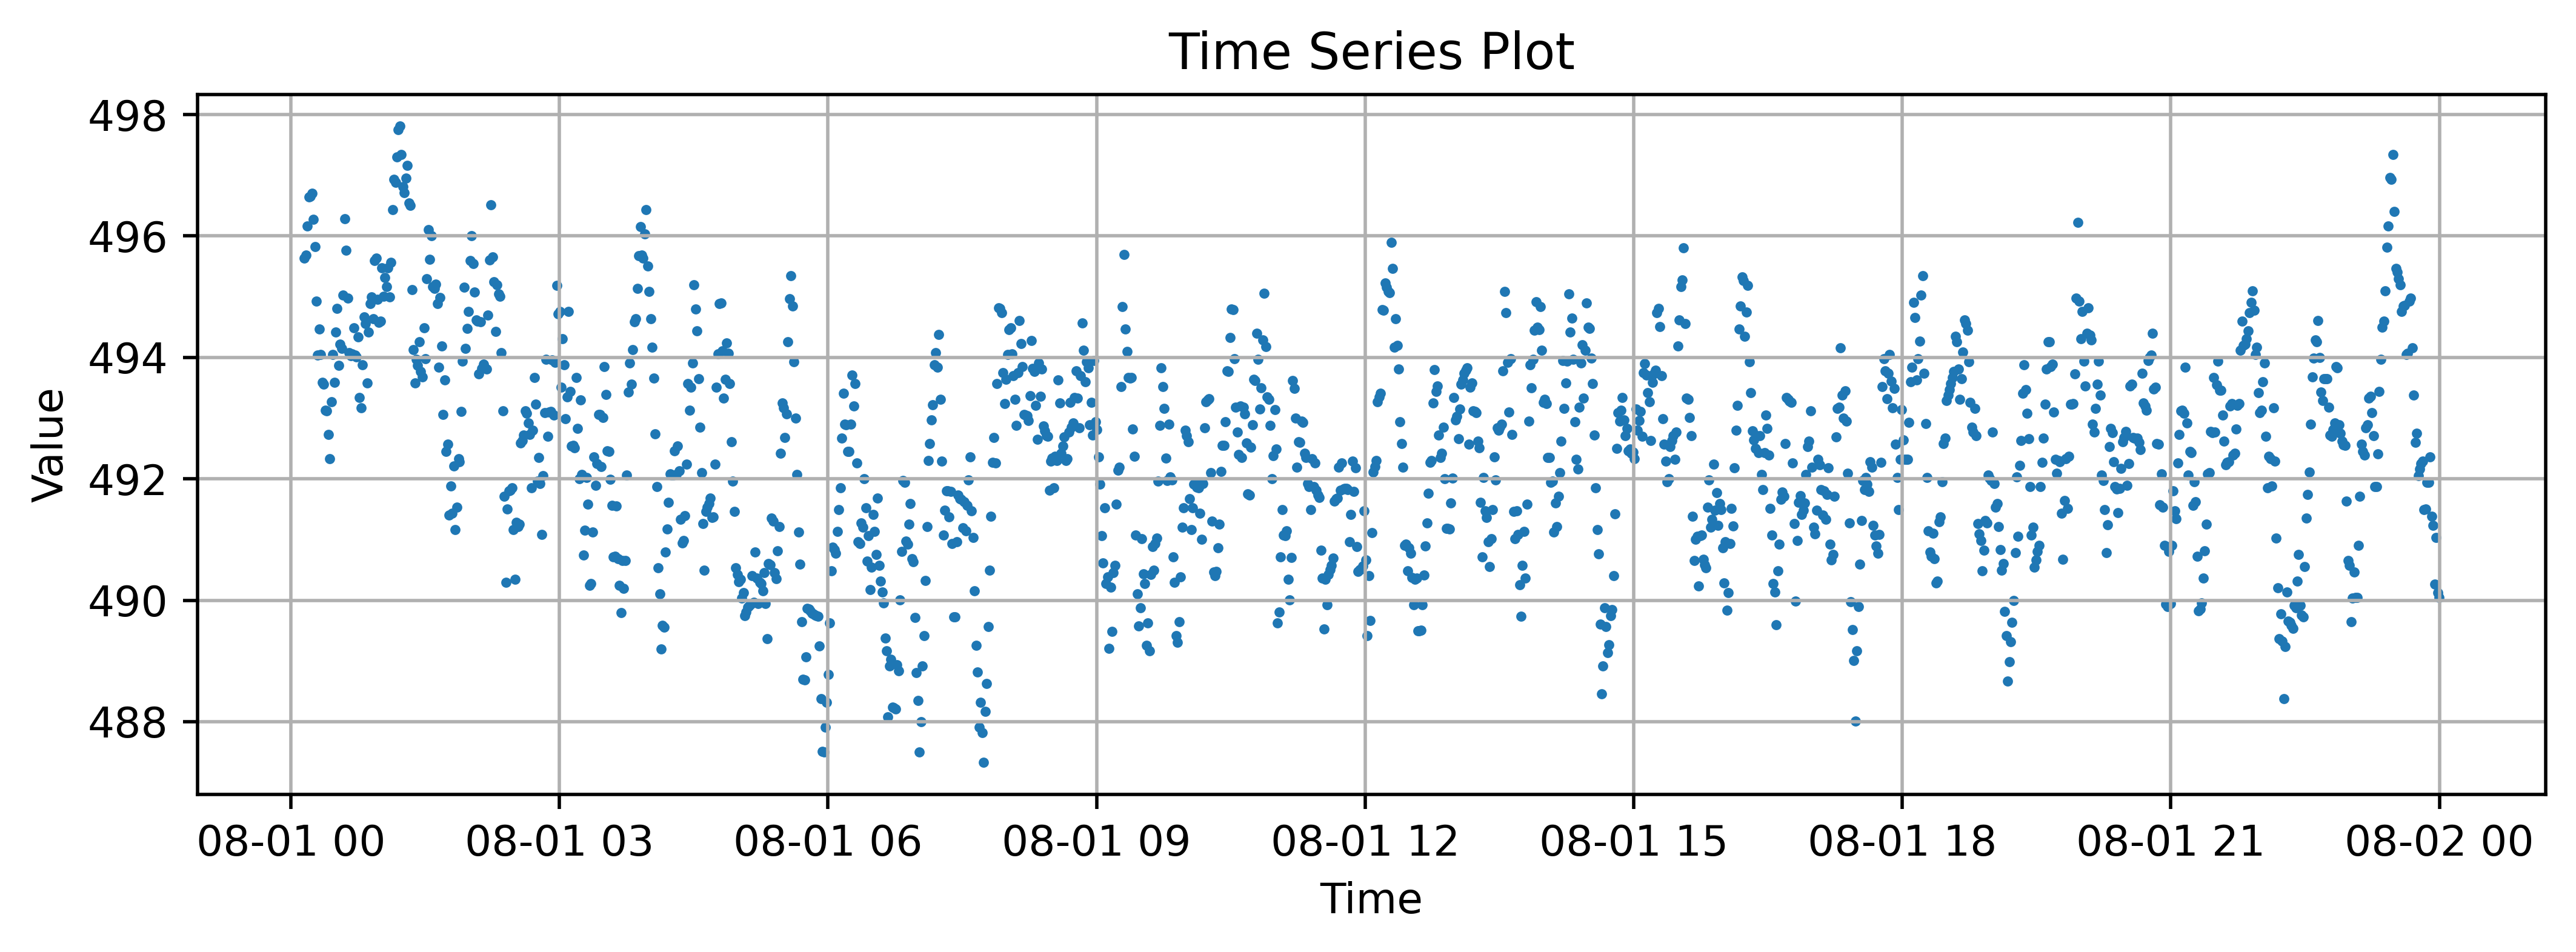

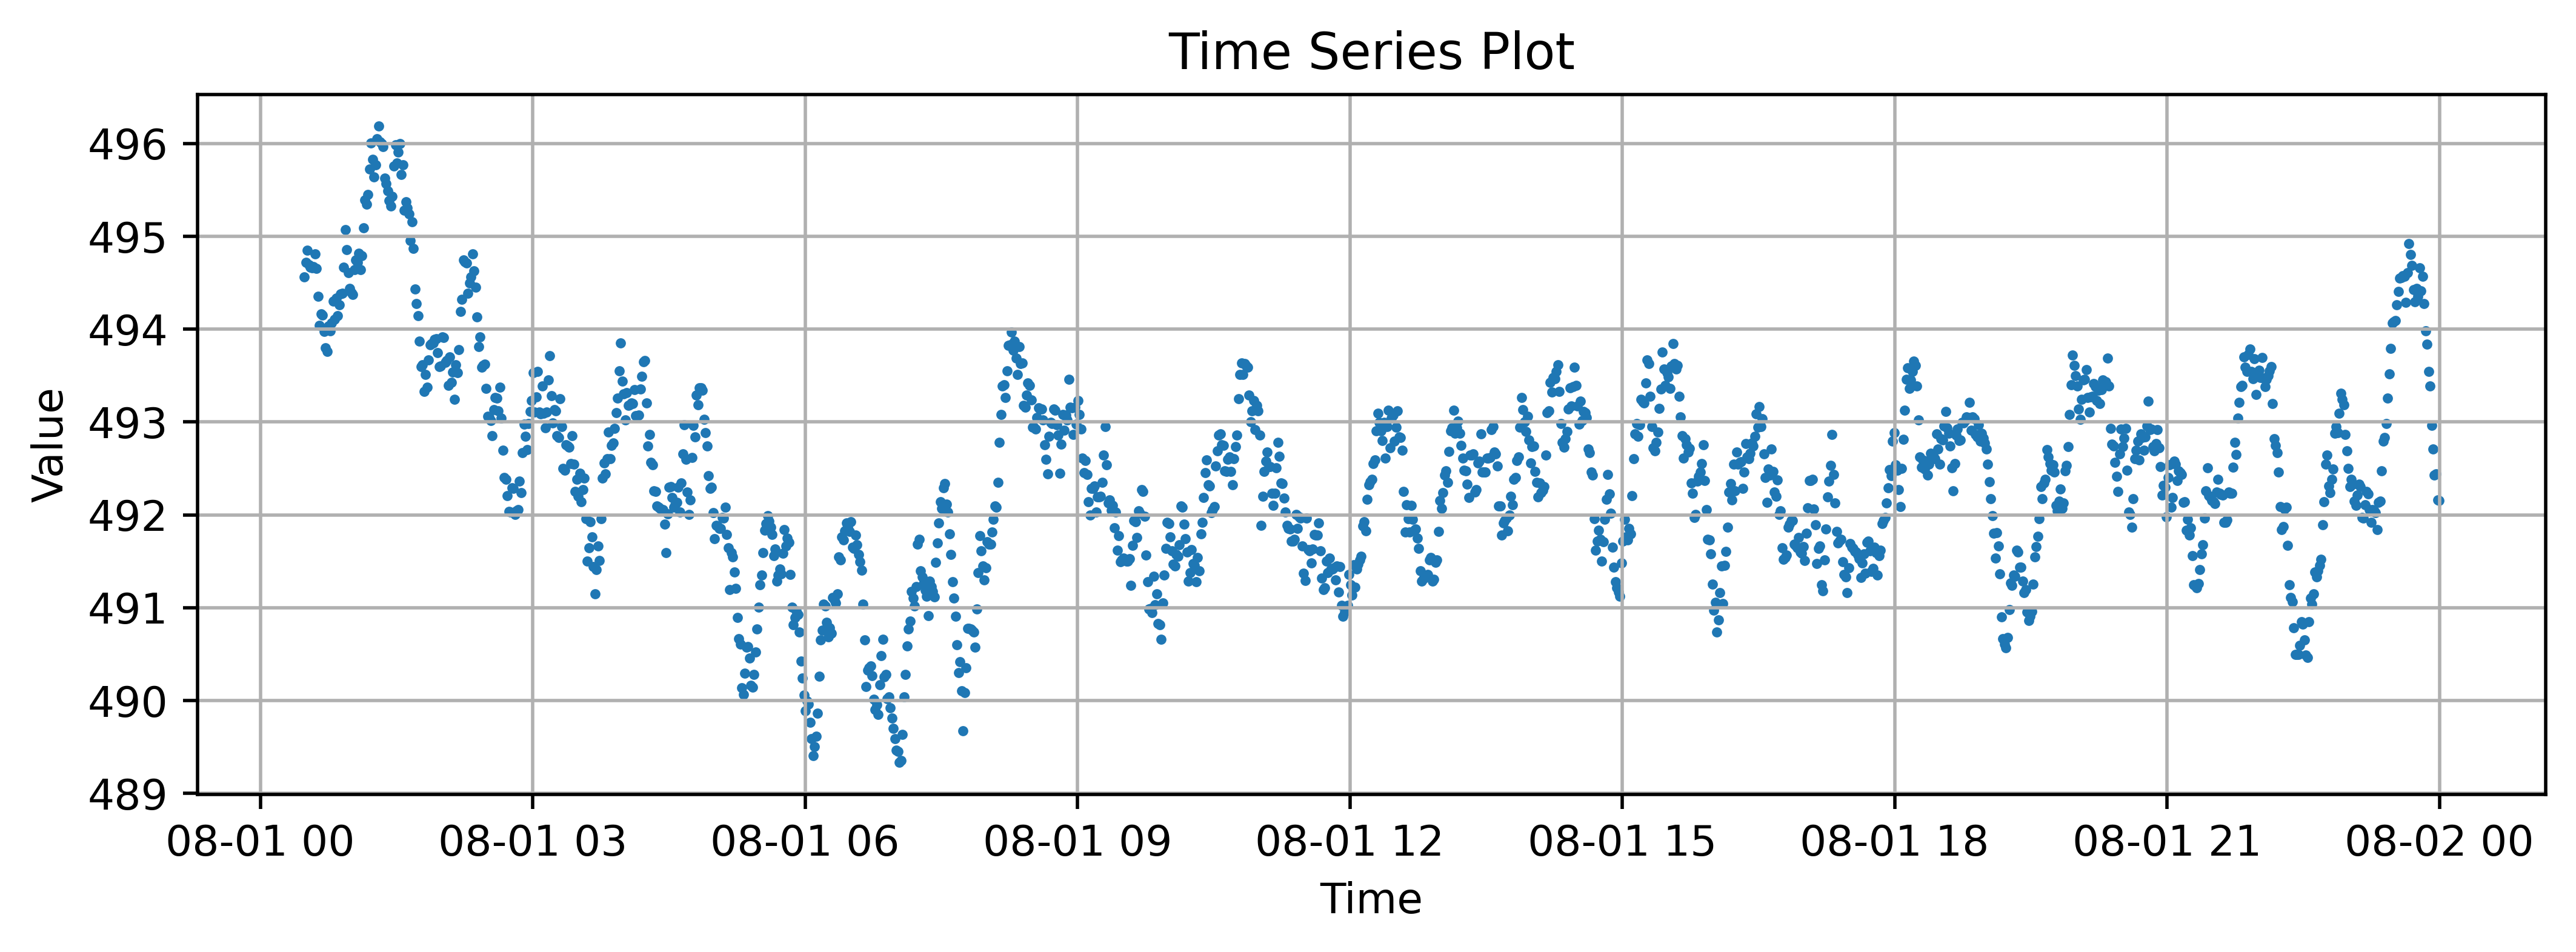

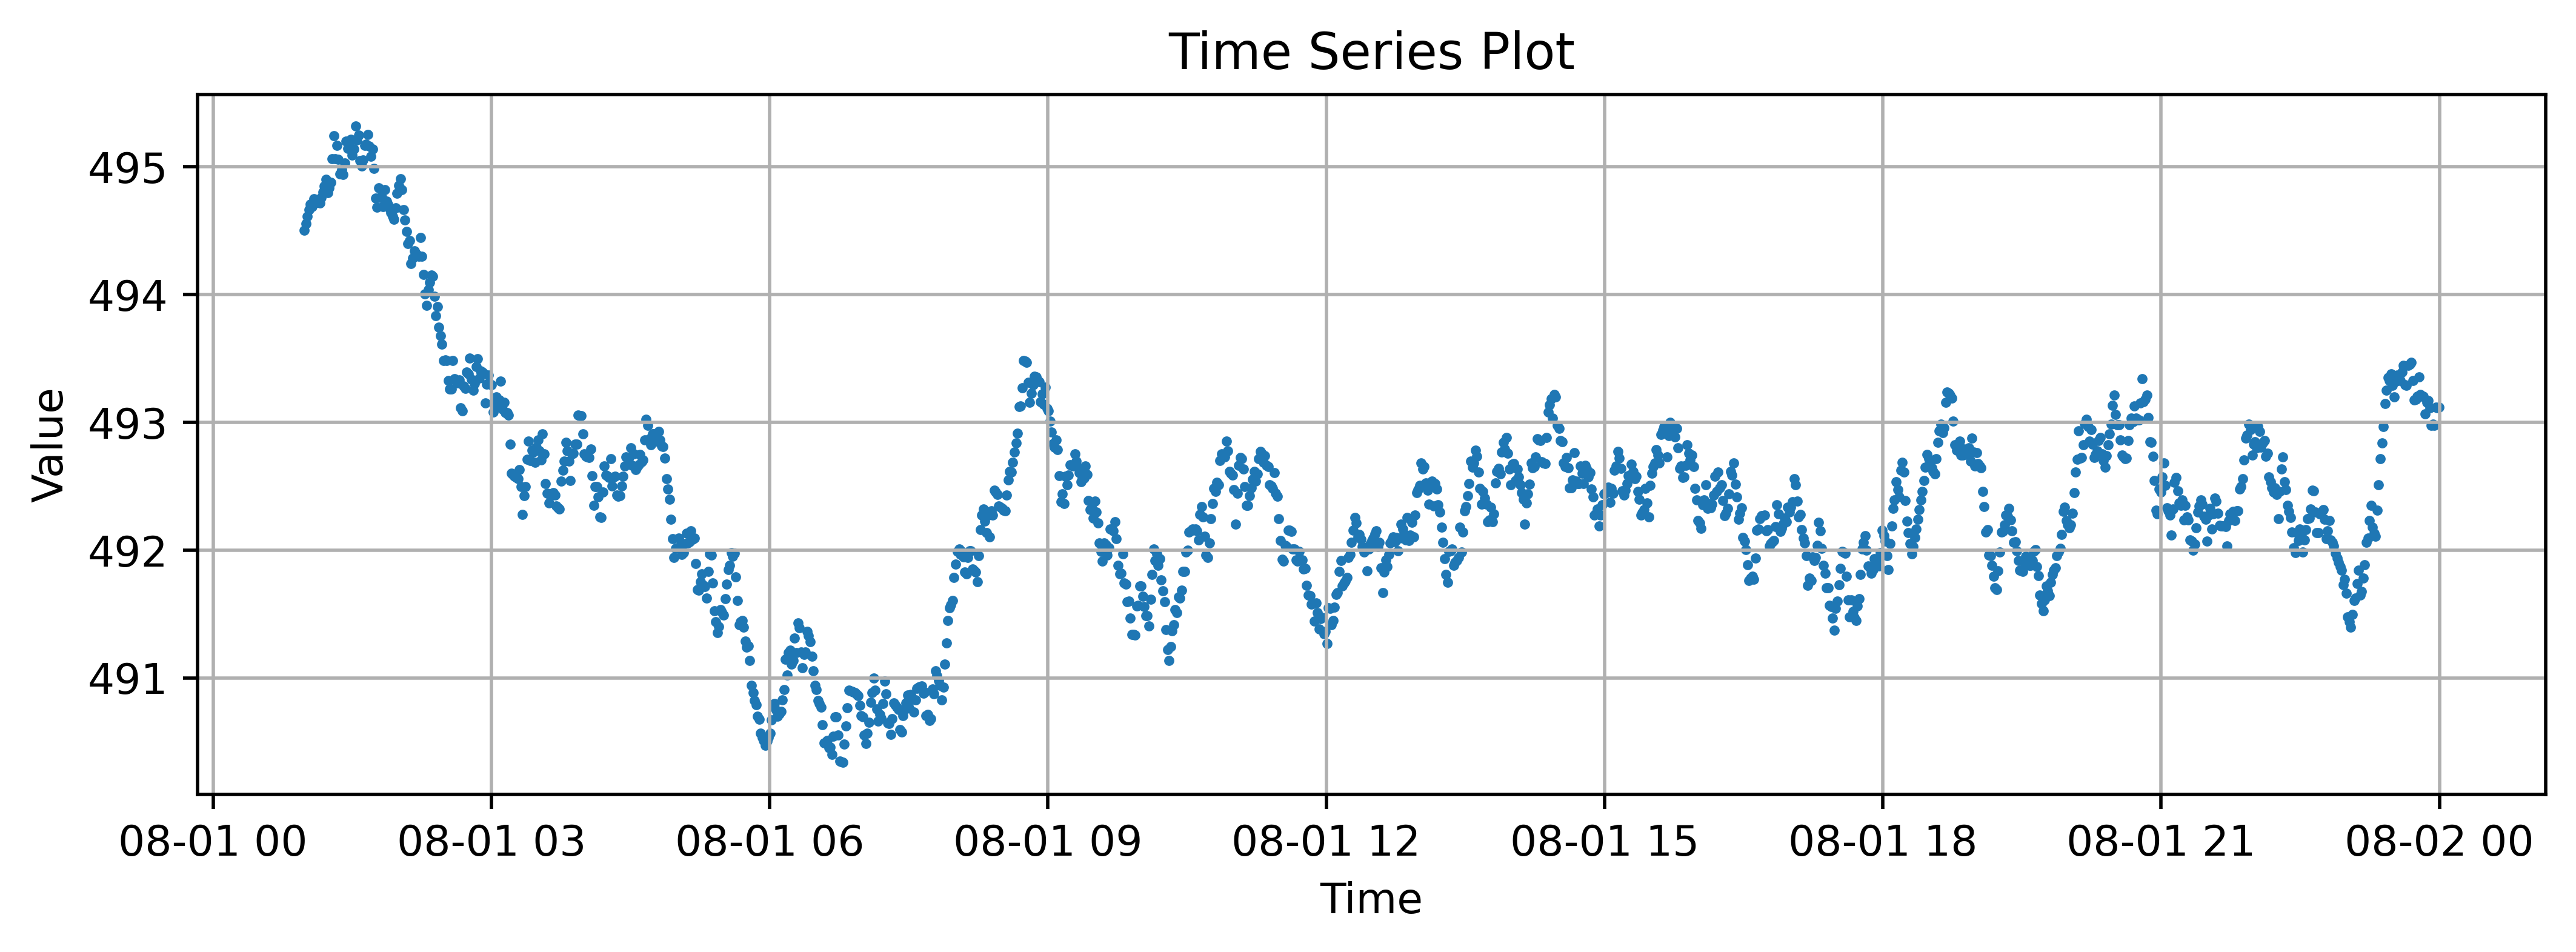

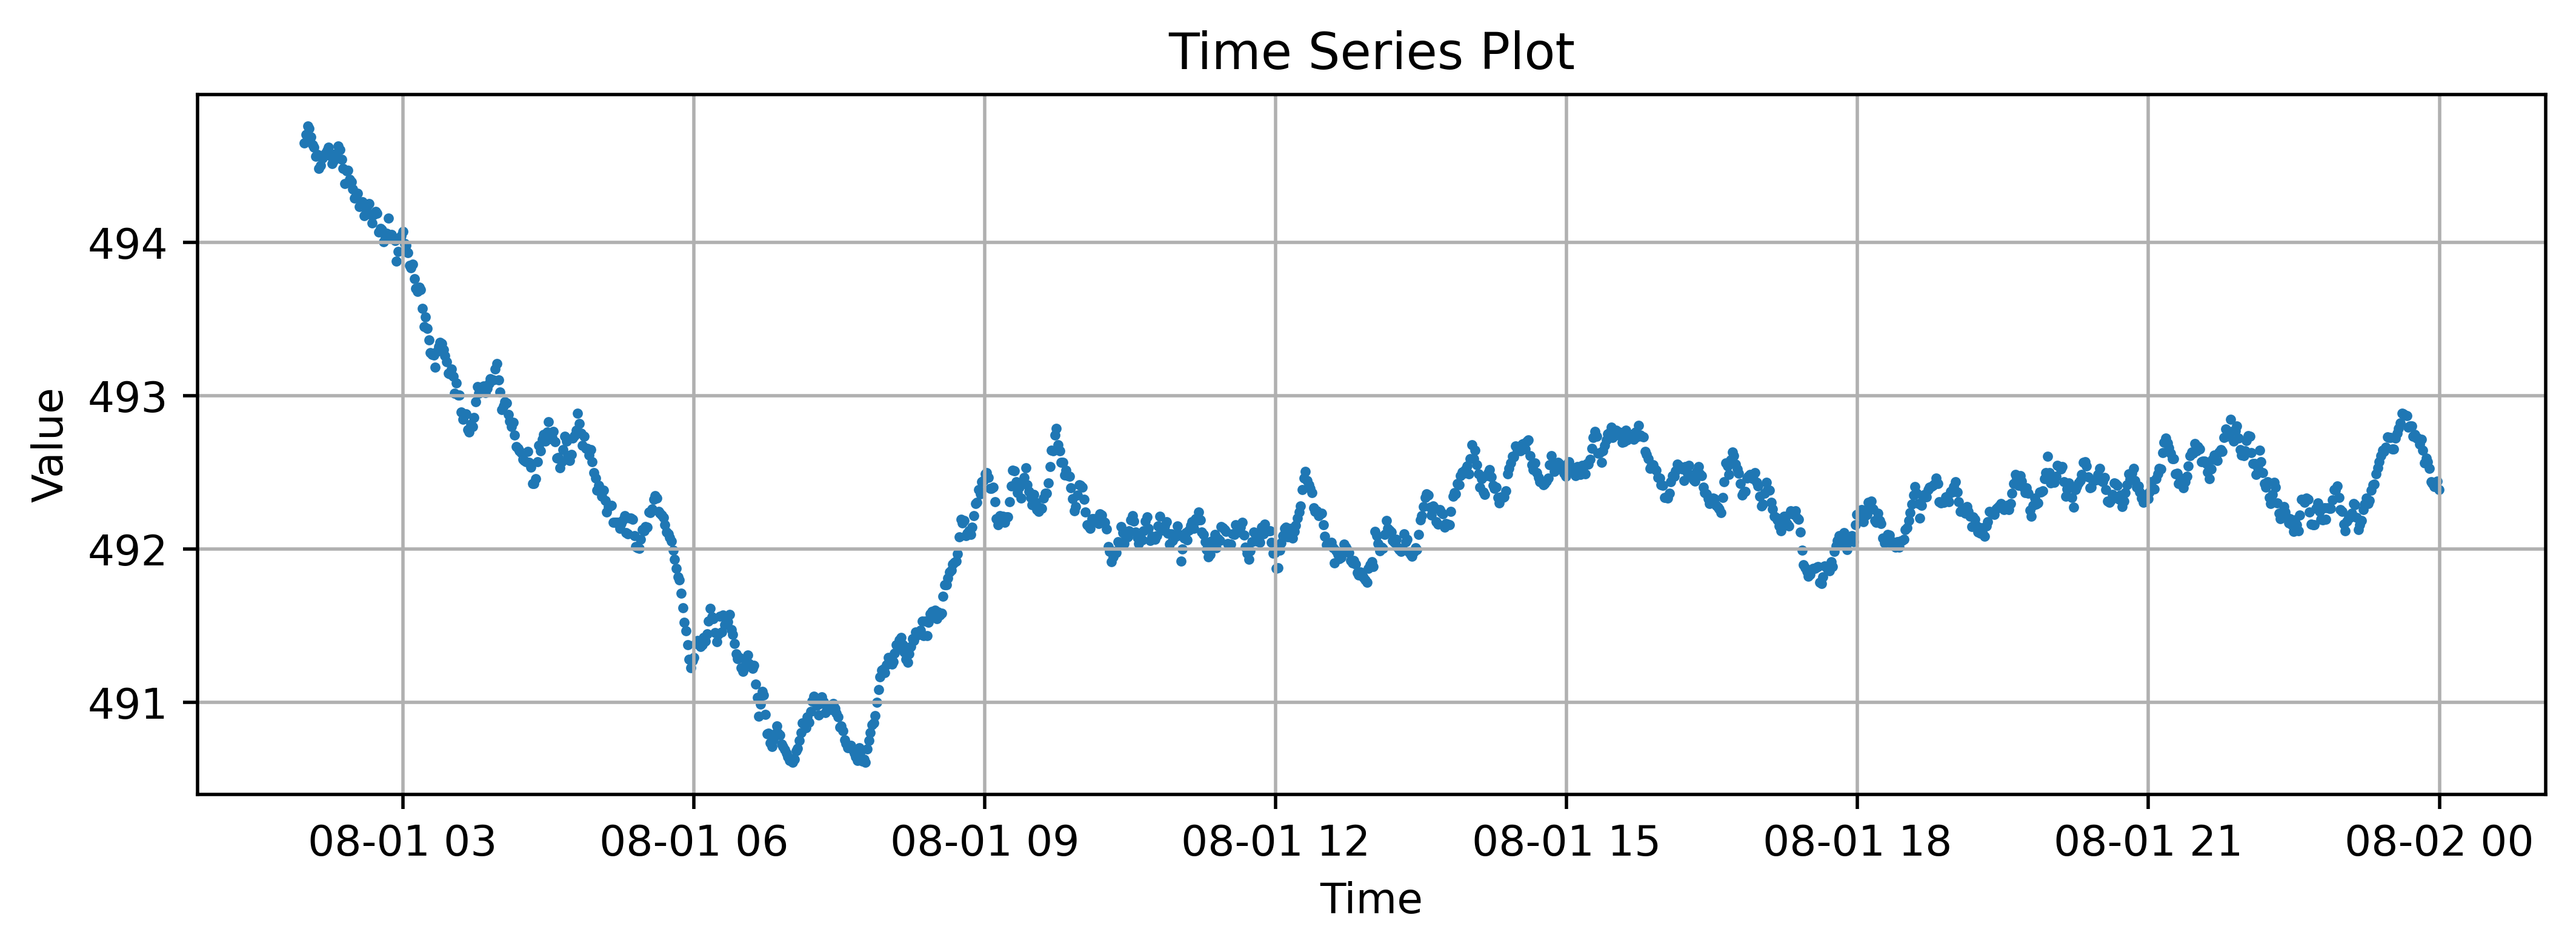

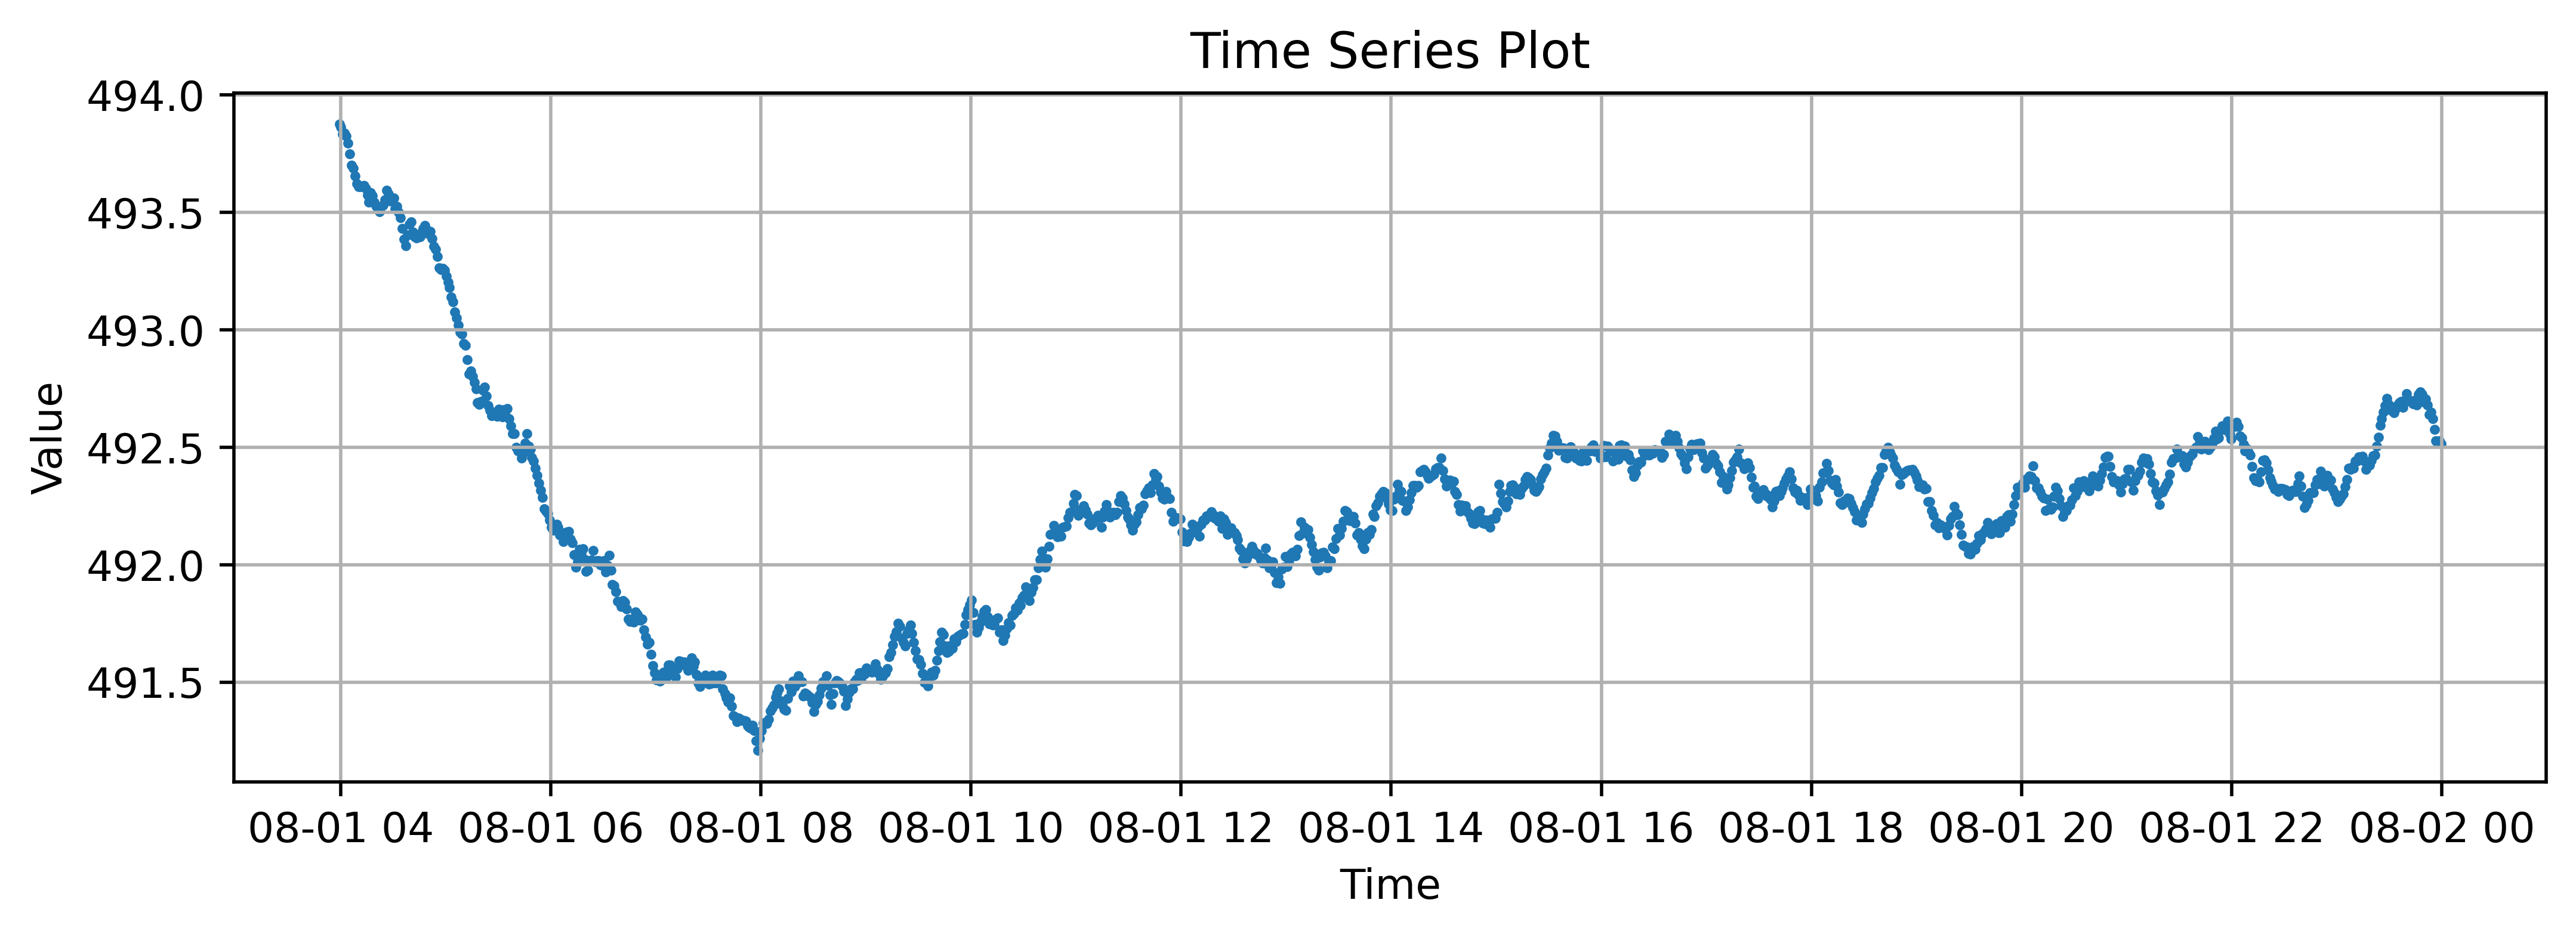

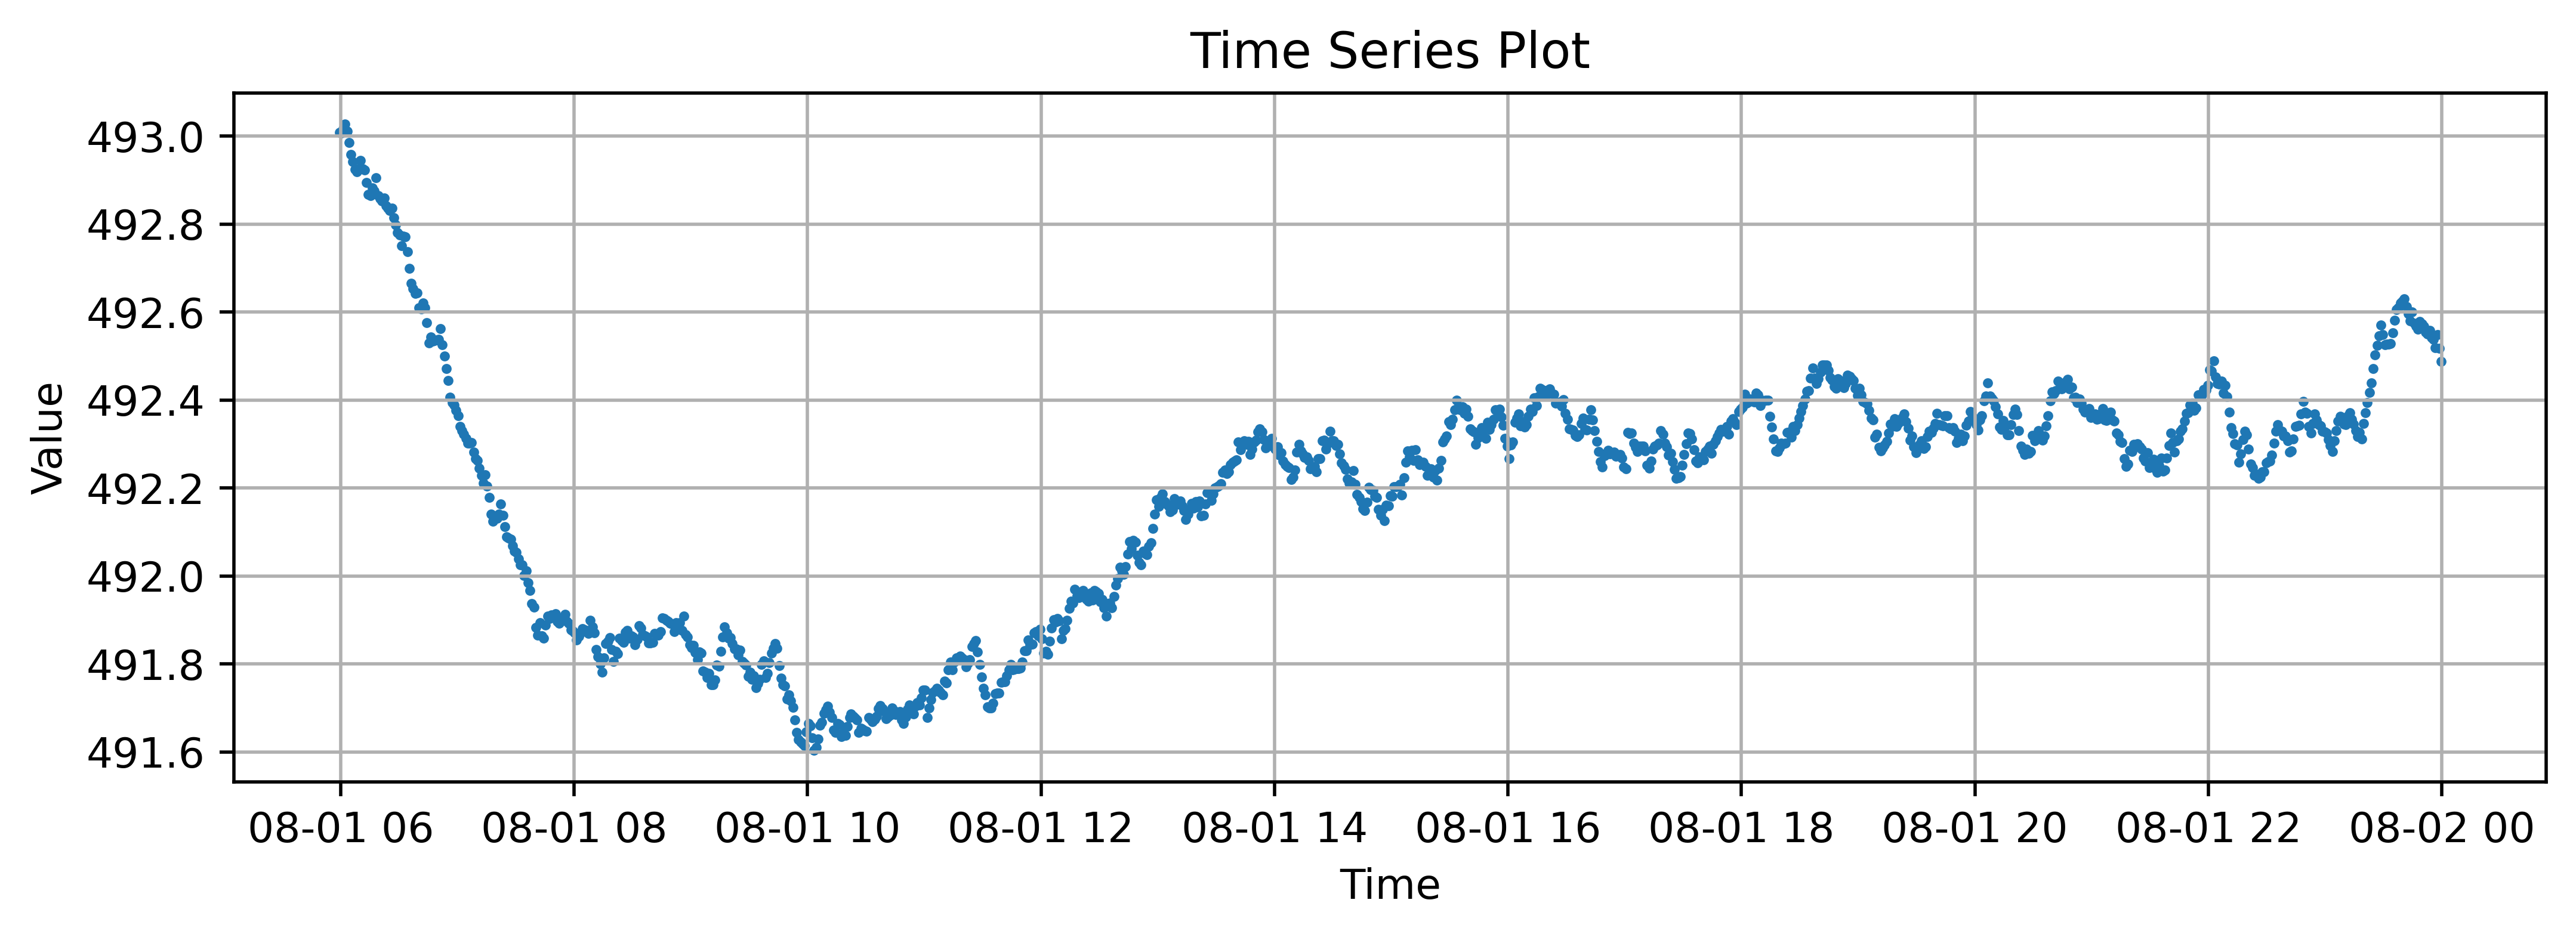

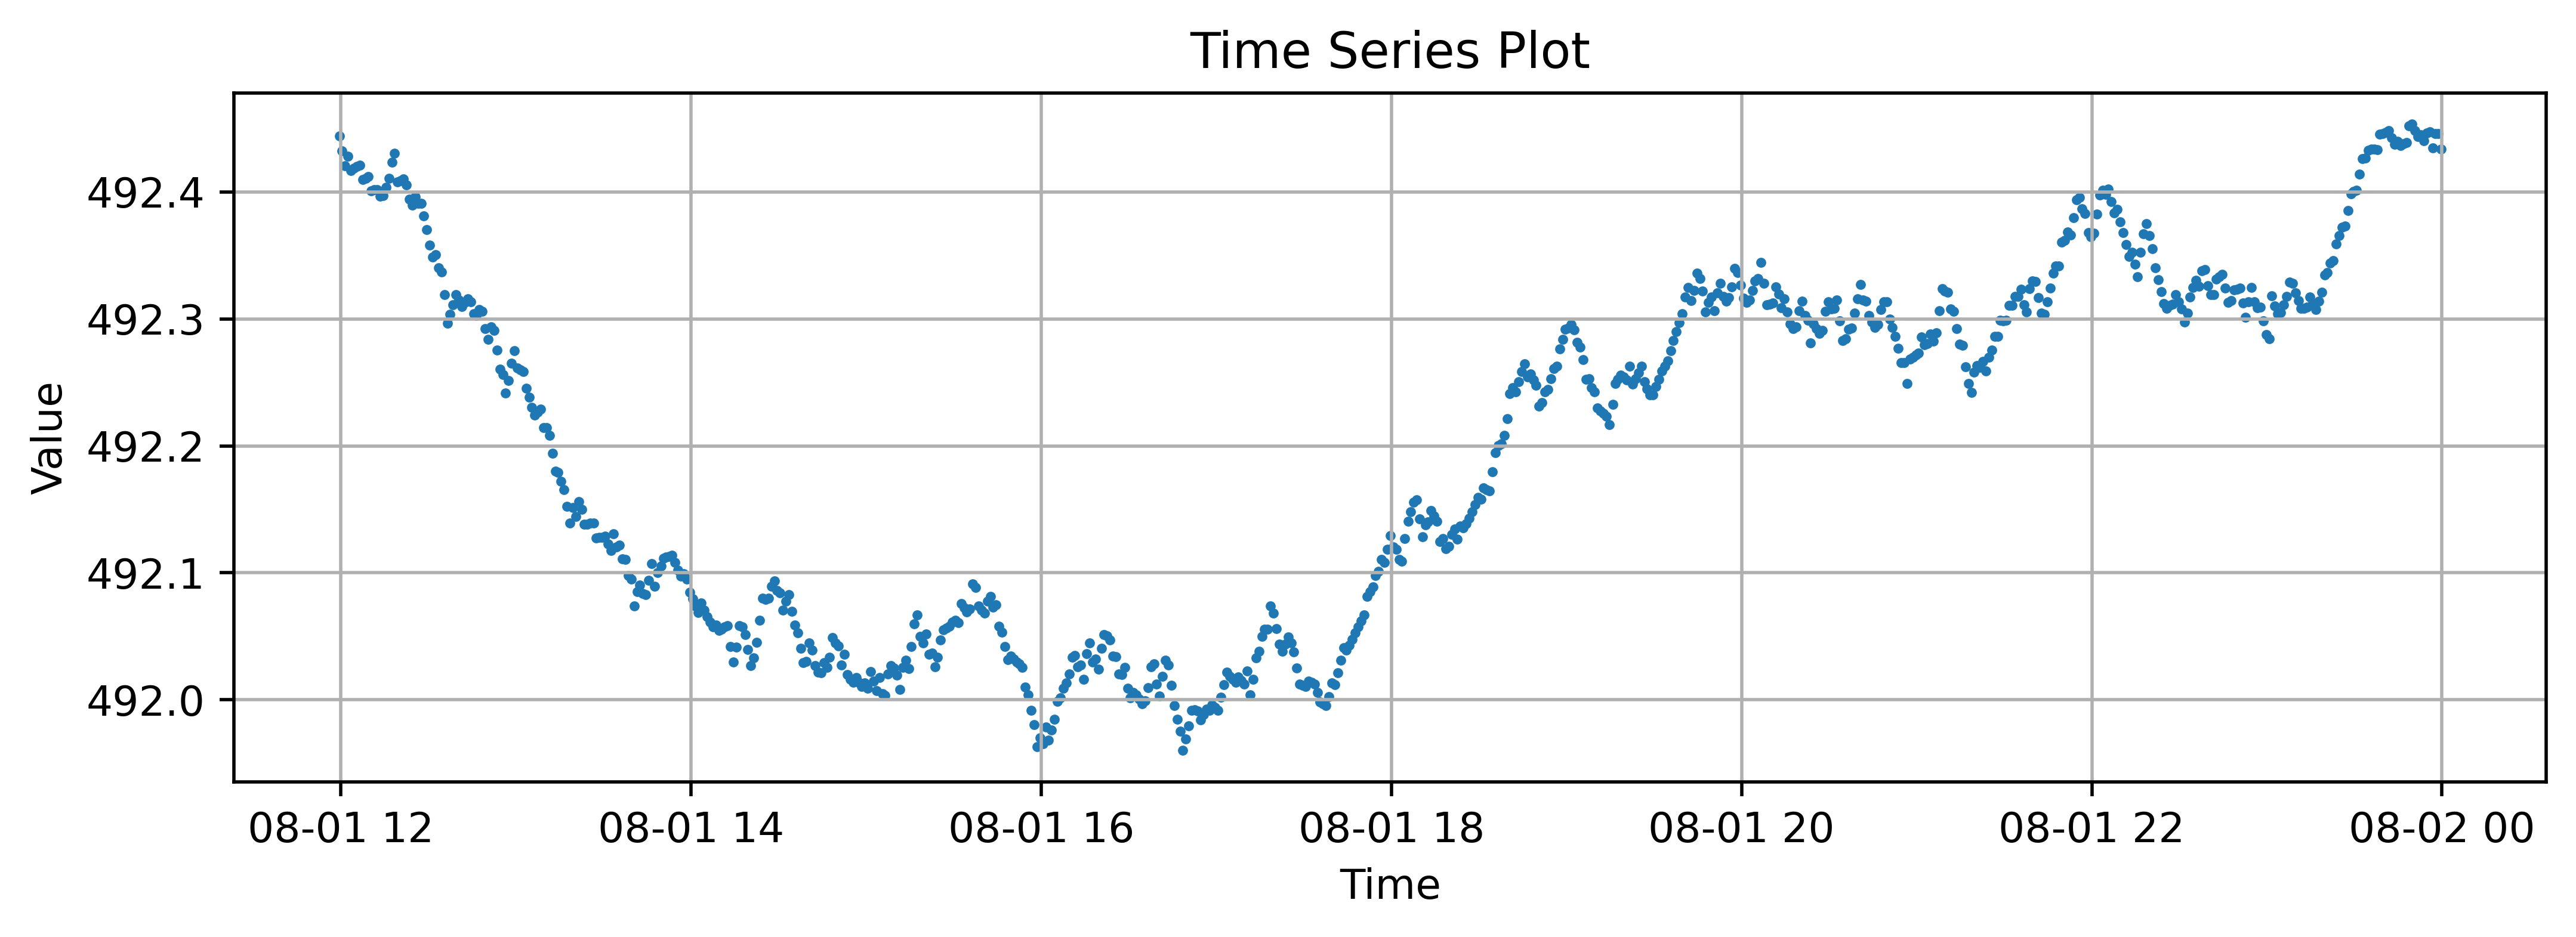

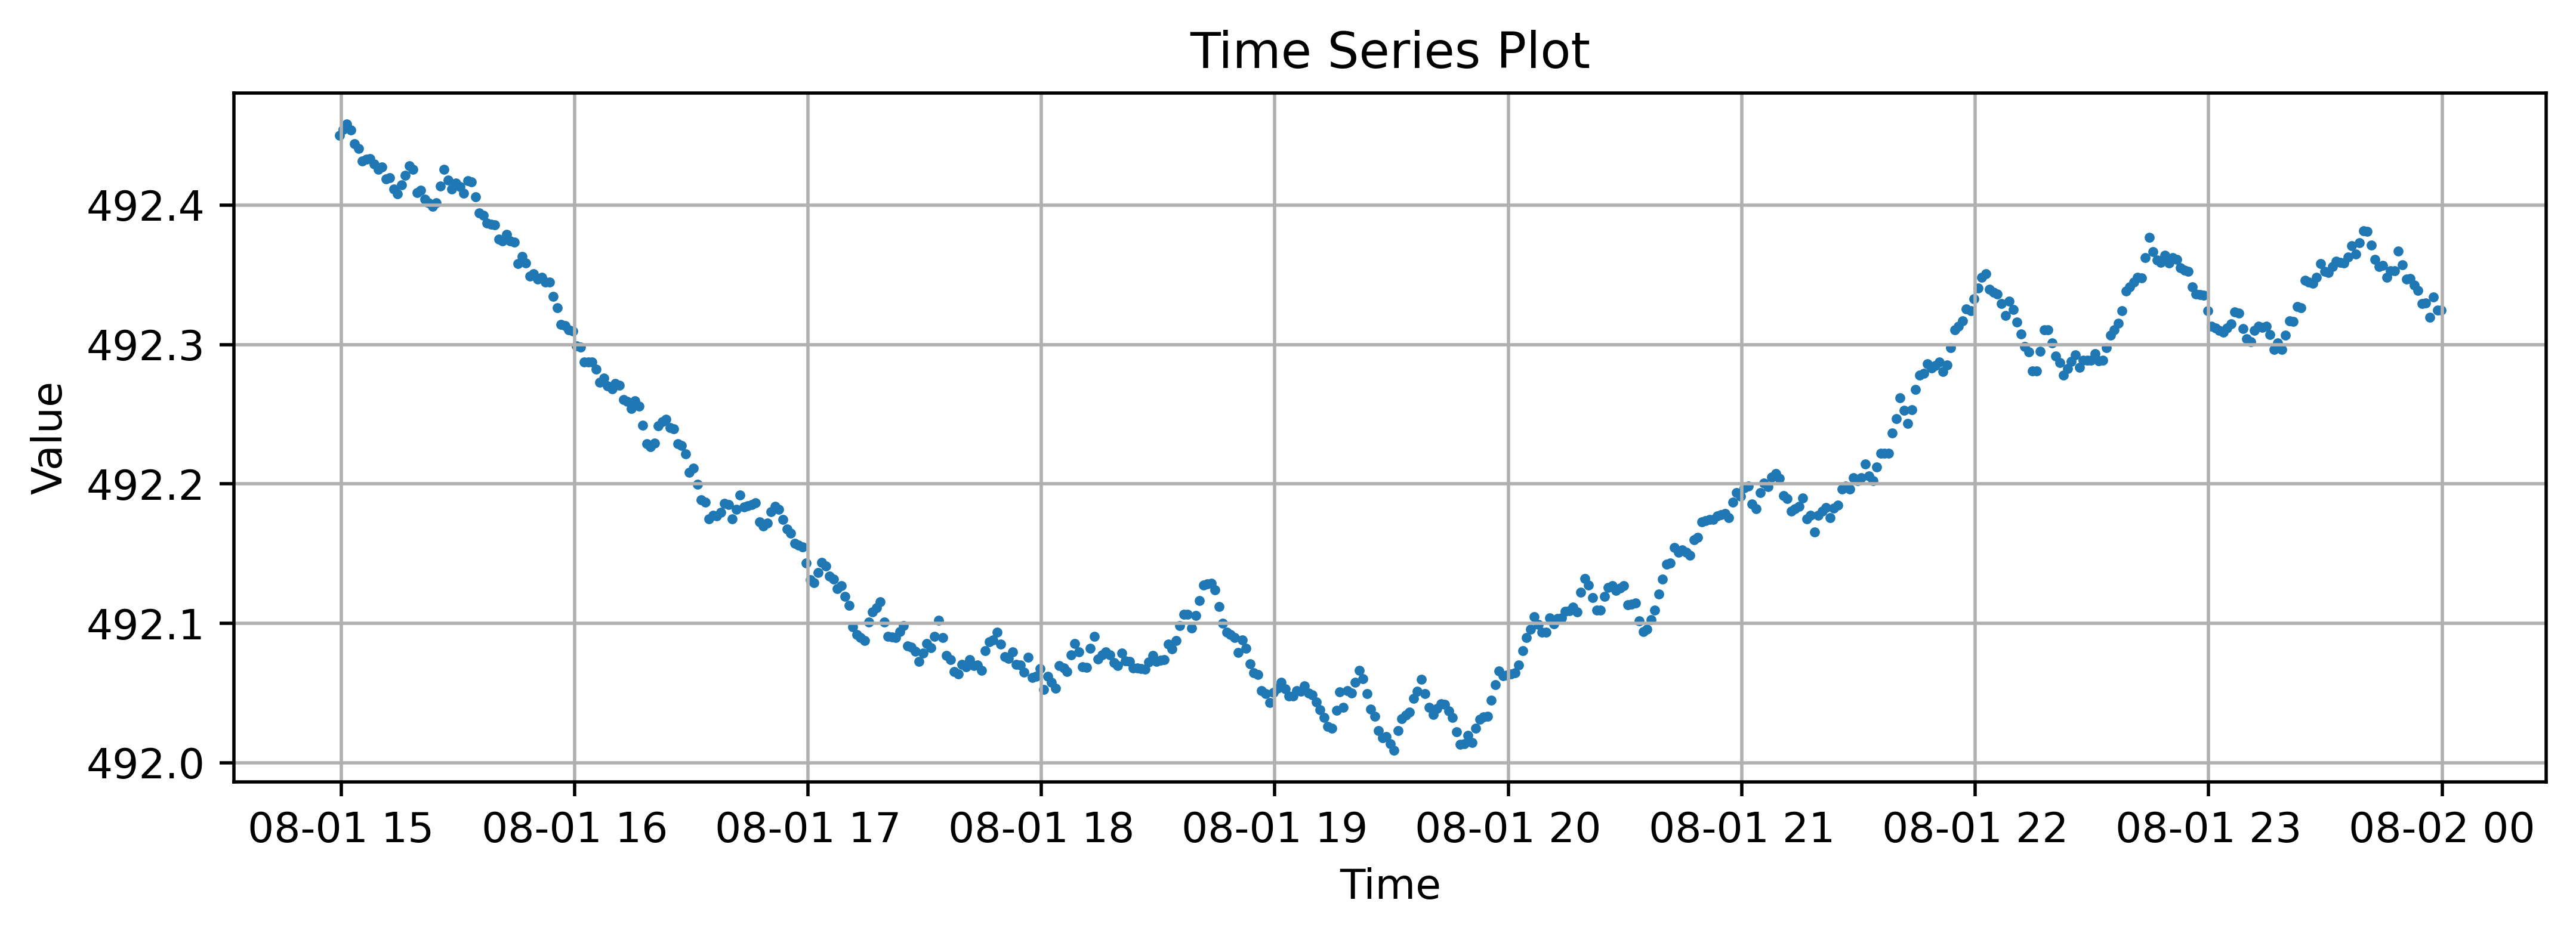

In [143]:
quick_plot(device_B['Time'],device_B['Power'].rolling(window=10).mean())
quick_plot(device_B['Time'],device_B['Power'].rolling(window=30).mean())
quick_plot(device_B['Time'],device_B['Power'].rolling(window=60).mean())
quick_plot(device_B['Time'],device_B['Power'].rolling(window=2*60).mean())
quick_plot(device_B['Time'],device_B['Power'].rolling(window=4*60).mean())
quick_plot(device_B['Time'],device_B['Power'].rolling(window=6*60).mean())
quick_plot(device_B['Time'],device_B['Power'].rolling(window=12*60).mean())
quick_plot(device_B['Time'],device_B['Power'].rolling(window=15*60).mean())

These plots are pretty interesting. We see a developing trend as we increase the rolling window. (I think) this trend can be used.

In [10]:
device_A['Power'].std()

1.7734498599183306

In [134]:
device_B['Power'].rolling(window=10).std()

5              NaN
76             NaN
149            NaN
221            NaN
293            NaN
            ...   
103325    3.675577
103395    3.134052
103468    3.644641
103541    2.982310
103612    3.032539
Name: Power, Length: 1440, dtype: float64

In [ ]:
for day in (tv_data['Time'].dt.dayofyear).unique():
    print(len(tv_data[tv_data['Time'].dt.dayofyear==day]['device_id'].unique()))

72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
